# EDA and feature engineering for banking data
---

## Dependencies

In [1]:
# Data
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from google.colab import drive

# Feature engineering
from sklearn.feature_selection import VarianceThreshold

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

pd.set_option('display.float_format', '{:,.2f}'.format)

warnings.filterwarnings('ignore')

# version des librairies utilisées
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("seaborn version :", sns.__version__)

pandas version : 1.5.3
numpy version : 1.23.5
seaborn version : 0.12.2


## Useful functions

In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [3]:
def get_df_info(df):
  return len(df.columns), df.shape[0], len(df.select_dtypes(include=numerics).columns), len(df.select_dtypes(include='object').columns)

## Data

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/My Drive/OCL/P7/data/'

In [6]:
X_train = pd.read_csv(path+'application_train.csv')
X_test = pd.read_csv(path+'application_test.csv')
bureau = pd.read_csv(path+'bureau.csv')
bureau_balance = pd.read_csv(path+'bureau_balance.csv')
pos_cash = pd.read_csv(path+'POS_CASH_balance.csv')
credit_card = pd.read_csv(path+'credit_card_balance.csv')
previous_application = pd.read_csv(path+'previous_application.csv')
installments_payments = pd.read_csv(path+'installments_payments.csv')
columns_description = pd.read_csv(path+'HomeCredit_columns_description.csv', encoding='ISO-8859-1')

In [7]:
datasets = [X_train, X_test, bureau,
            bureau_balance, pos_cash,
            credit_card, previous_application,
            installments_payments,
            columns_description]

titles = ['X_train', 'X_test', 'bureau',
          'bureau_balance', 'pos_cash',
          'credit_card', 'previous_application',
          'installments_payments',
          'columns_descriptions']

In [8]:
infos = []
for title, df in zip(titles, datasets):
  num_columns, num_rows, num_objects, num_numerics = get_df_info(df)
  infos.append({'Dataset name': title,
                'Number of columns': num_columns,
                'Number of rows': num_rows,
                'Number of object columns': num_objects,
                'Number of numeric columns': num_numerics})
info_df = pd.DataFrame(infos)

In [9]:
info_df

,Dataset name,Number of columns,Number of rows,Number of object columns,Number of numeric columns
0,X_train,122,307511,106,16
1,X_test,121,48744,105,16
2,bureau,17,1716428,14,3
3,bureau_balance,3,27299925,2,1
4,pos_cash,8,10001358,7,1
5,credit_card,23,3840312,22,1
6,previous_application,37,1670214,21,16
7,installments_payments,8,13605401,8,0
8,columns_descriptions,5,219,1,4


In [10]:
X_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,"157,500.00","254,700.00","27,558.00",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,"72,000.00","269,550.00","12,001.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,"153,000.00","677,664.00","29,979.00",...,0,0,0,0,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,"171,000.00","370,107.00","20,205.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
print(X_train.duplicated(subset=['SK_ID_CURR']).sum())

0


**No duplicate SK_ID, so one credit per line**

In [12]:
yn_df = X_train['TARGET'].value_counts().to_frame()

In [13]:
yn_df

,TARGET
0,282686
1,24825


Text(0.5, 1.0, 'Clients having difficulty repaying the loan')

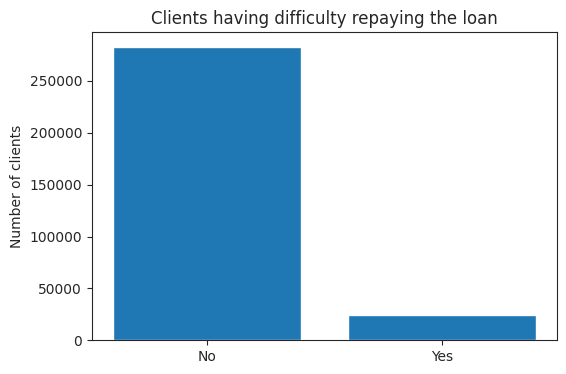

In [14]:
plt.bar(['No', 'Yes'], yn_df['TARGET'])
plt.ylabel('Number of clients')
plt.title('Clients having difficulty repaying the loan')

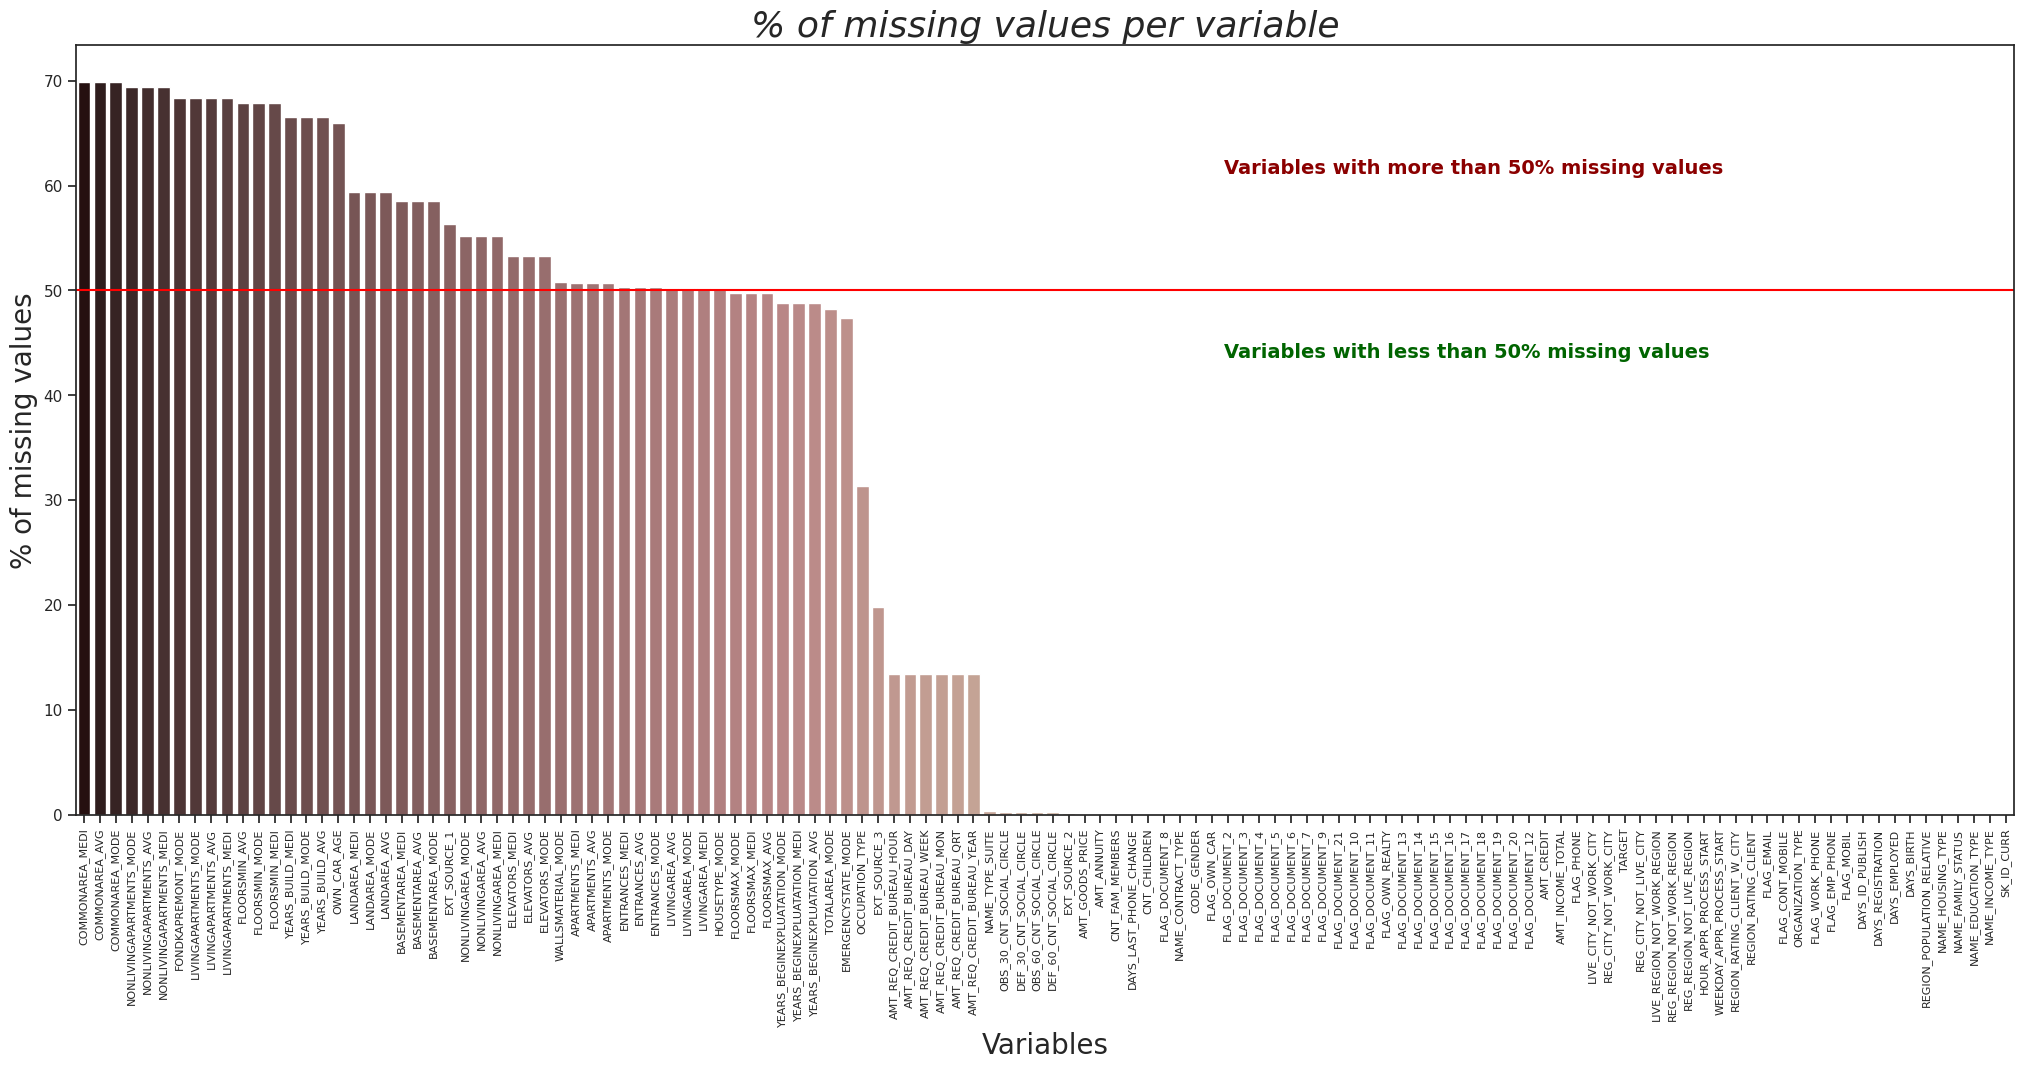

In [15]:
sns.set(style="ticks", rc = {'figure.figsize':(25,10)}, palette= "pink")
thresh_na = 50

ax = plt.subplot(1,1,1)
perc = (X_train.isnull().sum()/X_train.shape[0])*100
perc = perc.sort_values(ascending=False)

ax = sns.barplot(x = X_train.columns, y = perc, palette = "pink")

plt.axhline(y = thresh_na, color = 'r', linestyle = '-')

plt.text(len(X_train.isnull().sum()/len(X_train))/1.7,
         thresh_na+12.5, 'Variables with more than %s%s missing values' %(thresh_na, '%'),
         fontsize = 14, weight = 'bold', color = 'darkred', ha = 'left' , va = 'top')

plt.text(len(X_train.isnull().sum()/len(X_train))/1.7,
         thresh_na - 5, 'Variables with less than %s%s missing values' %(thresh_na, '%'),
         fontsize = 14, weight = 'bold', color = 'darkgreen', ha = 'left' , va = 'top')

ax.set_title('% of missing values per variable', loc="center", fontsize = 26, fontstyle='italic')
ax.set_xlabel('Variables', fontsize = 20)
ax.set_ylabel('% of missing values', fontsize = 20)
ax.set_xticklabels(perc.index, rotation = 90, fontsize = 8)

plt.show()

**Find out missing columns**

In [16]:
vars_with_na_1 = [var for var in X_train.columns if X_train[var].isnull().mean() > 0.5]
print(vars_with_na_1)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [17]:
X_train[vars_with_na_1].dtypes

OWN_CAR_AGE                 float64
EXT_SOURCE_1                float64
APARTMENTS_AVG              float64
BASEMENTAREA_AVG            float64
YEARS_BUILD_AVG             float64
COMMONAREA_AVG              float64
ELEVATORS_AVG               float64
ENTRANCES_AVG               float64
FLOORSMIN_AVG               float64
LANDAREA_AVG                float64
LIVINGAPARTMENTS_AVG        float64
LIVINGAREA_AVG              float64
NONLIVINGAPARTMENTS_AVG     float64
NONLIVINGAREA_AVG           float64
APARTMENTS_MODE             float64
BASEMENTAREA_MODE           float64
YEARS_BUILD_MODE            float64
COMMONAREA_MODE             float64
ELEVATORS_MODE              float64
ENTRANCES_MODE              float64
FLOORSMIN_MODE              float64
LANDAREA_MODE               float64
LIVINGAPARTMENTS_MODE       float64
LIVINGAREA_MODE             float64
NONLIVINGAPARTMENTS_MODE    float64
NONLIVINGAREA_MODE          float64
APARTMENTS_MEDI             float64
BASEMENTAREA_MEDI           

In [18]:
X_train[vars_with_na_1].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
OWN_CAR_AGE,"104,582.00",12.06,11.94,0.00,5.00,9.00,15.00,91.00
EXT_SOURCE_1,"134,133.00",0.50,0.21,0.01,0.33,0.51,0.68,0.96
APARTMENTS_AVG,"151,450.00",0.12,0.11,0.00,0.06,0.09,0.15,1.00
BASEMENTAREA_AVG,"127,568.00",0.09,0.08,0.00,0.04,0.08,0.11,1.00
YEARS_BUILD_AVG,"103,023.00",0.75,0.11,0.00,0.69,0.76,0.82,1.00
COMMONAREA_AVG,"92,646.00",0.04,0.08,0.00,0.01,0.02,0.05,1.00
ELEVATORS_AVG,"143,620.00",0.08,0.13,0.00,0.00,0.00,0.12,1.00
ENTRANCES_AVG,"152,683.00",0.15,0.10,0.00,0.07,0.14,0.21,1.00
FLOORSMIN_AVG,"98,869.00",0.23,0.16,0.00,0.08,0.21,0.38,1.00
LANDAREA_AVG,"124,921.00",0.07,0.08,0.00,0.02,0.05,0.09,1.00


In [19]:
X_train.drop(labels=vars_with_na_1, axis=1, inplace=True)
X_train.shape

(307511, 81)

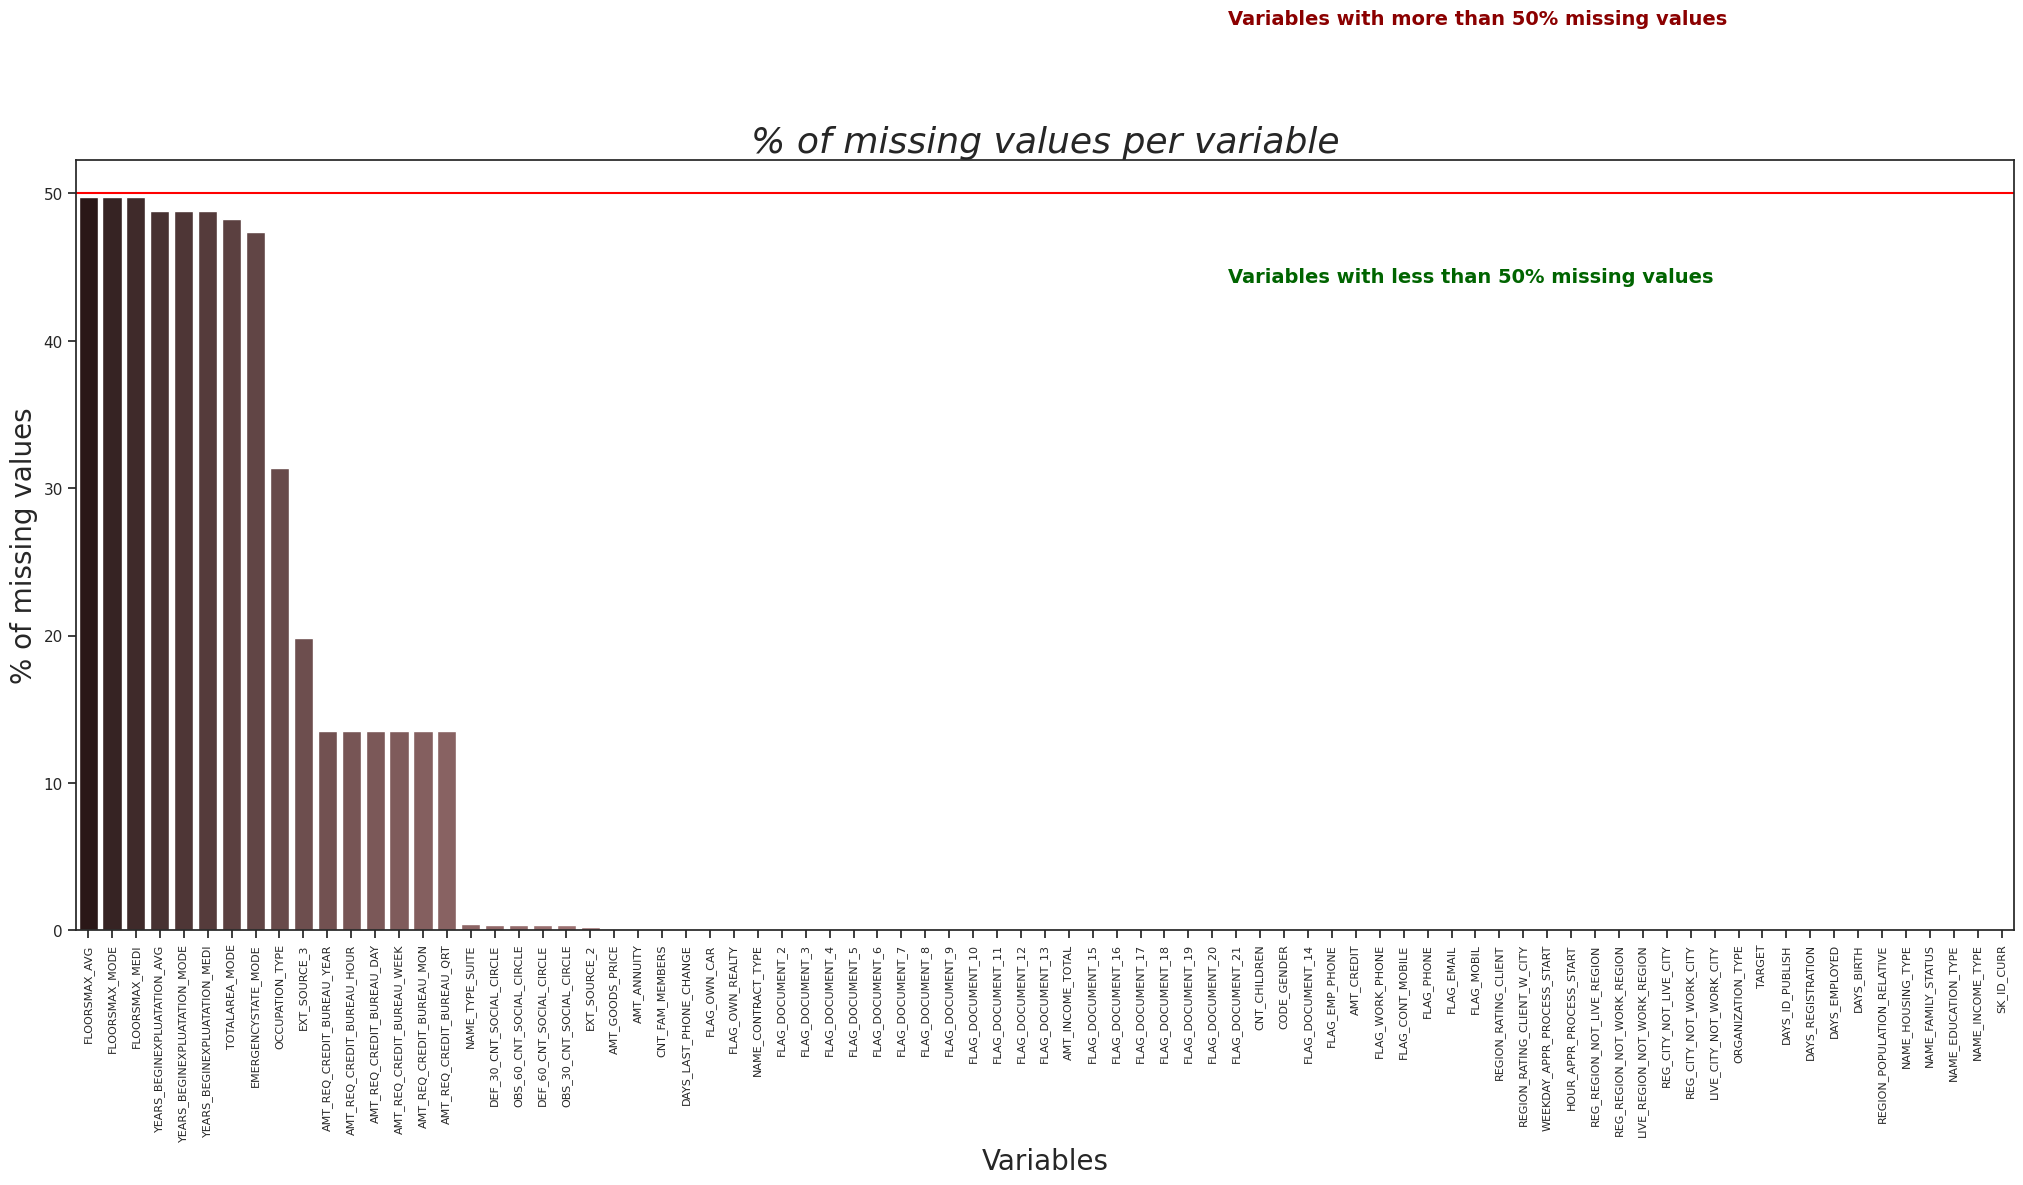

In [20]:
sns.set(style="ticks", rc = {'figure.figsize':(25,10)}, palette= "pink")
thresh_na = 50

ax = plt.subplot(1,1,1)
perc = (X_train.isnull().sum()/X_train.shape[0])*100
perc = perc.sort_values(ascending=False)

ax = sns.barplot(x = X_train.columns, y = perc, palette = "pink")

plt.axhline(y = thresh_na, color = 'r', linestyle = '-')

plt.text(len(X_train.isnull().sum()/len(X_train))/1.7,
         thresh_na+12.5, 'Variables with more than %s%s missing values' %(thresh_na, '%'),
         fontsize = 14, weight = 'bold', color = 'darkred', ha = 'left' , va = 'top')

plt.text(len(X_train.isnull().sum()/len(X_train))/1.7,
         thresh_na - 5, 'Variables with less than %s%s missing values' %(thresh_na, '%'),
         fontsize = 14, weight = 'bold', color = 'darkgreen', ha = 'left' , va = 'top')

ax.set_title('% of missing values per variable', loc="center", fontsize = 26, fontstyle='italic')
ax.set_xlabel('Variables', fontsize = 20)
ax.set_ylabel('% of missing values', fontsize = 20)
ax.set_xticklabels(perc.index, rotation = 90, fontsize = 8)

plt.show()

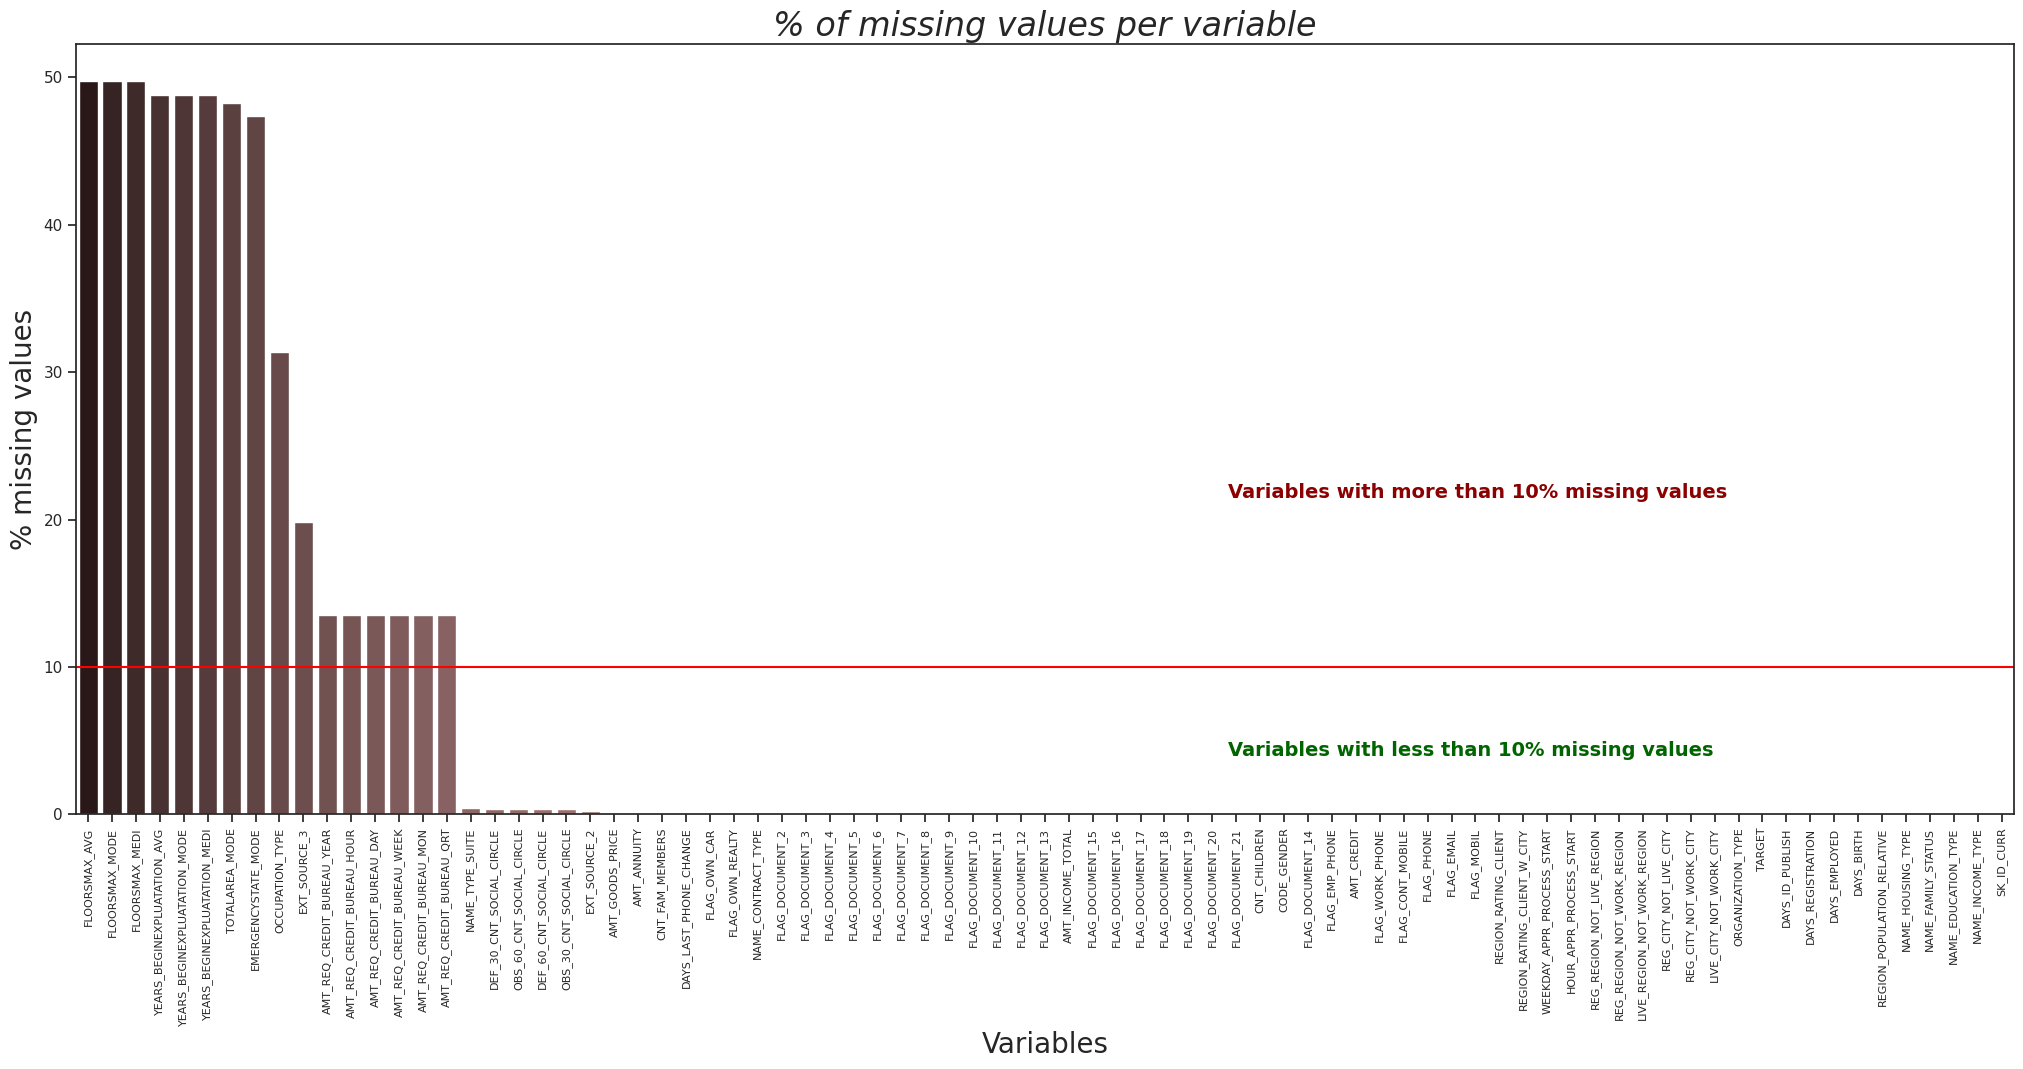

In [21]:
sns.set(style="ticks", rc = {'figure.figsize':(25,10)}, palette= "pink")
thresh_na = 10

ax = plt.subplot(1,1,1)
perc = (X_train.isnull().sum()/X_train.shape[0])*100
perc = perc.sort_values(ascending=False)

ax = sns.barplot(x = X_train.columns, y = perc, palette = "pink")

plt.axhline(y = thresh_na, color = 'r', linestyle = '-')

plt.text(len(X_train.isnull().sum()/len(X_train))/1.7,
         thresh_na+12.5, 'Variables with more than %s%s missing values' %(thresh_na, '%'),
         fontsize = 14, weight = 'bold', color = 'darkred', ha = 'left' , va = 'top')

plt.text(len(X_train.isnull().sum()/len(X_train))/1.7,
         thresh_na - 5, 'Variables with less than %s%s missing values' %(thresh_na, '%'),
         fontsize = 14, weight = 'bold', color = 'darkgreen', ha = 'left' , va = 'top')

ax.set_title('% of missing values per variable', loc="center", fontsize = 24, fontstyle='italic')
ax.set_xlabel('Variables', fontsize = 20)
ax.set_ylabel('% missing values', fontsize = 20)
ax.set_xticklabels(perc.index, rotation = 90, fontsize = 8)

plt.show()

In [22]:
vars_with_na_2 = [var for var in X_train.columns if X_train[var].isnull().mean() > 0.1]
print(vars_with_na_2)

['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [23]:
X_train[vars_with_na_2].dtypes

OCCUPATION_TYPE                  object
EXT_SOURCE_3                    float64
YEARS_BEGINEXPLUATATION_AVG     float64
FLOORSMAX_AVG                   float64
YEARS_BEGINEXPLUATATION_MODE    float64
FLOORSMAX_MODE                  float64
YEARS_BEGINEXPLUATATION_MEDI    float64
FLOORSMAX_MEDI                  float64
TOTALAREA_MODE                  float64
EMERGENCYSTATE_MODE              object
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
dtype: object

In [24]:
X_train[vars_with_na_2].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
EXT_SOURCE_3,"246,546.00",0.51,0.19,0.00,0.37,0.54,0.67,0.90
YEARS_BEGINEXPLUATATION_AVG,"157,504.00",0.98,0.06,0.00,0.98,0.98,0.99,1.00
FLOORSMAX_AVG,"154,491.00",0.23,0.14,0.00,0.17,0.17,0.33,1.00
YEARS_BEGINEXPLUATATION_MODE,"157,504.00",0.98,0.06,0.00,0.98,0.98,0.99,1.00
FLOORSMAX_MODE,"154,491.00",0.22,0.14,0.00,0.17,0.17,0.33,1.00
YEARS_BEGINEXPLUATATION_MEDI,"157,504.00",0.98,0.06,0.00,0.98,0.98,0.99,1.00
FLOORSMAX_MEDI,"154,491.00",0.23,0.15,0.00,0.17,0.17,0.33,1.00
TOTALAREA_MODE,"159,080.00",0.10,0.11,0.00,0.04,0.07,0.13,1.00
AMT_REQ_CREDIT_BUREAU_HOUR,"265,992.00",0.01,0.08,0.00,0.00,0.00,0.00,4.00
AMT_REQ_CREDIT_BUREAU_DAY,"265,992.00",0.01,0.11,0.00,0.00,0.00,0.00,9.00


In [25]:
X_train.drop(labels=vars_with_na_2, axis=1, inplace=True)
X_train.shape

(307511, 65)

In [26]:
vars_with_na_3 = [var for var in X_train.columns if X_train[var].isnull().mean() > 0]
print(vars_with_na_3)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


In [27]:
X_train[vars_with_na_3].dtypes

AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_TYPE_SUITE              object
CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
DAYS_LAST_PHONE_CHANGE      float64
dtype: object

In [28]:
X_train['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)*100

Unaccompanied     80.82
Family            13.06
Spouse, partner    3.70
Children           1.06
Other_B            0.58
NaN                0.42
Other_A            0.28
Group of people    0.09
Name: NAME_TYPE_SUITE, dtype: float64

In [29]:
X_train[vars_with_na_3].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,"307,499.00","27,108.57","14,493.74","1,615.50","16,524.00","24,903.00","34,596.00","258,025.50"
AMT_GOODS_PRICE,"307,233.00","538,396.21","369,446.46","40,500.00","238,500.00","450,000.00","679,500.00","4,050,000.00"
CNT_FAM_MEMBERS,"307,509.00",2.15,0.91,1.00,2.00,2.00,3.00,20.00
EXT_SOURCE_2,"306,851.00",0.51,0.19,0.00,0.39,0.57,0.66,0.85
OBS_30_CNT_SOCIAL_CIRCLE,"306,490.00",1.42,2.40,0.00,0.00,0.00,2.00,348.00
DEF_30_CNT_SOCIAL_CIRCLE,"306,490.00",0.14,0.45,0.00,0.00,0.00,0.00,34.00
OBS_60_CNT_SOCIAL_CIRCLE,"306,490.00",1.41,2.38,0.00,0.00,0.00,2.00,344.00
DEF_60_CNT_SOCIAL_CIRCLE,"306,490.00",0.10,0.36,0.00,0.00,0.00,0.00,24.00
DAYS_LAST_PHONE_CHANGE,"307,510.00",-962.86,826.81,"-4,292.00","-1,570.00",-757.00,-274.00,0.00


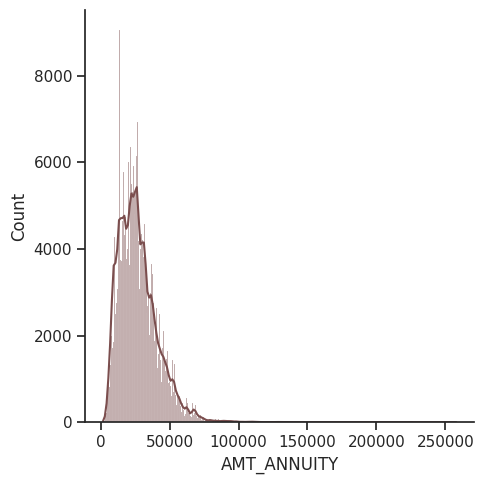

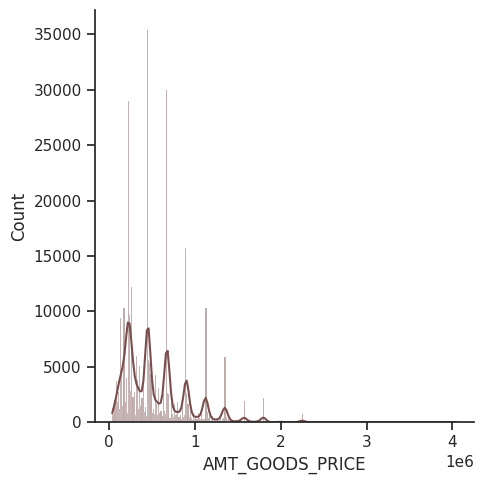

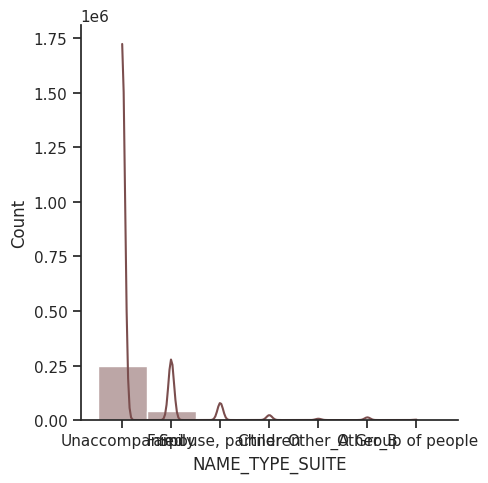

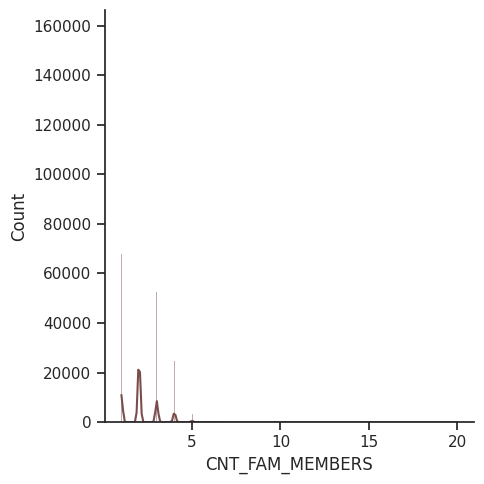

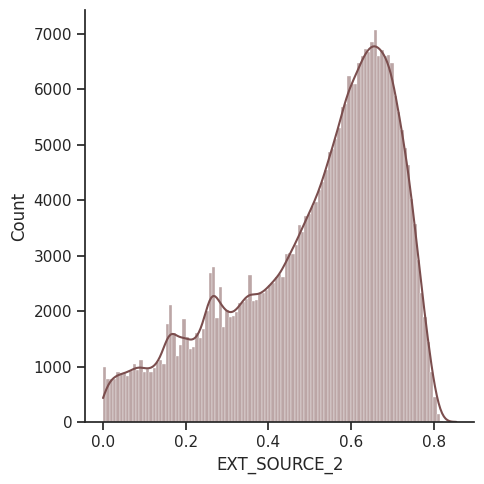

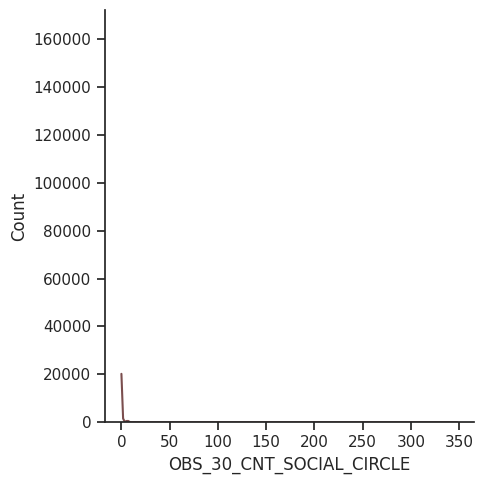

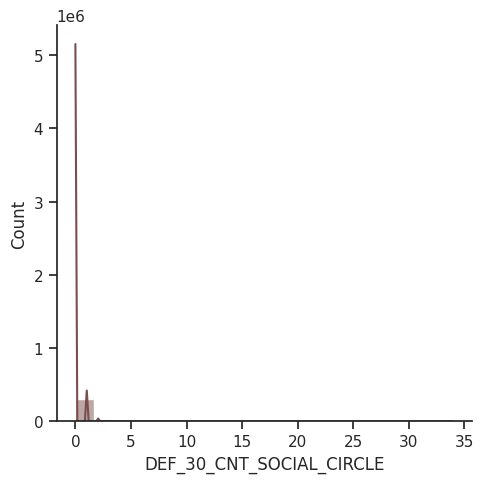

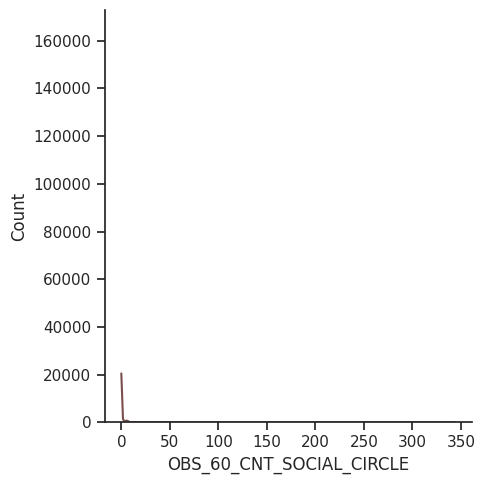

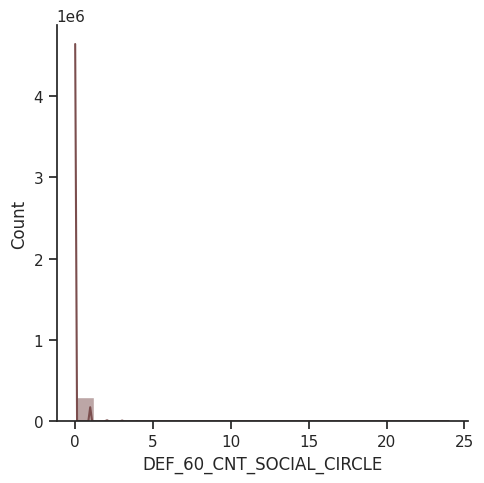

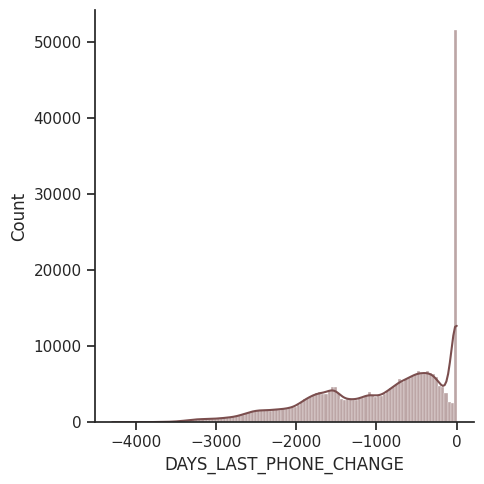

In [30]:
for column in vars_with_na_3:
  sns.displot(data=X_train, x=column, kde=True)

In [31]:
# Assign a variable to drop from X_test
vars_with_na_drop = vars_with_na_1 + vars_with_na_2

In [32]:
X_test.drop(labels=vars_with_na_drop, axis=1, inplace=True)
X_test.shape

(48744, 64)

In [33]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 9.4 MB/s eta 0:00:00


In [34]:
from feature_engine.imputation import MeanMedianImputer

# To perform median imputation, we specify the
# imputation strategy

imputer = MeanMedianImputer(imputation_method='median')

# we fit the imputer

imputer.fit(X_train)

# The imputer found the numerical variables to
# impute with the median

print(imputer.variables_)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT

In [35]:
clean_X_train = imputer.transform(X_train)
clean_X_train.shape

(307511, 65)

In [37]:
imputer = MeanMedianImputer(imputation_method='median')

# we fit the imputer

imputer.fit(X_test)

MeanMedianImputer()

In [38]:
# Now for X_test
clean_X_test = imputer.transform(X_test)
clean_X_test.shape

(48744, 64)

In [39]:
# Now for imputing categorical variables

# We specify how we want to impute
# the categorical variables.
from feature_engine.imputation import CategoricalImputer

imputer = CategoricalImputer(imputation_method='frequent')
# we fit the imputer
imputer.fit(clean_X_train)
# here we can see the values that will be used
# to replace NA for each variable
imputer.imputer_dict_

{'NAME_CONTRACT_TYPE': 'Cash loans',
 'CODE_GENDER': 'F',
 'FLAG_OWN_CAR': 'N',
 'FLAG_OWN_REALTY': 'Y',
 'NAME_TYPE_SUITE': 'Unaccompanied',
 'NAME_INCOME_TYPE': 'Working',
 'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
 'NAME_FAMILY_STATUS': 'Married',
 'NAME_HOUSING_TYPE': 'House / apartment',
 'WEEKDAY_APPR_PROCESS_START': 'TUESDAY',
 'ORGANIZATION_TYPE': 'Business Entity Type 3'}

In [42]:
clean_X_train = imputer.transform(clean_X_train)

In [43]:
# Now for imputing categorical variables

# We specify how we want to impute
# the categorical variables.
from feature_engine.imputation import CategoricalImputer

imputer = CategoricalImputer(imputation_method='frequent')
# we fit the imputer
imputer.fit(clean_X_test)
# here we can see the values that will be used
# to replace NA for each variable
imputer.imputer_dict_

{'NAME_CONTRACT_TYPE': 'Cash loans',
 'CODE_GENDER': 'F',
 'FLAG_OWN_CAR': 'N',
 'FLAG_OWN_REALTY': 'Y',
 'NAME_TYPE_SUITE': 'Unaccompanied',
 'NAME_INCOME_TYPE': 'Working',
 'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
 'NAME_FAMILY_STATUS': 'Married',
 'NAME_HOUSING_TYPE': 'House / apartment',
 'WEEKDAY_APPR_PROCESS_START': 'TUESDAY',
 'ORGANIZATION_TYPE': 'Business Entity Type 3'}

In [44]:
clean_X_test = imputer.transform(clean_X_test)

In [45]:
clean_X_test.shape, clean_X_train.shape

((48744, 64), (307511, 65))

In [46]:
clean_X_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [47]:
map_gender = {'F' : 'Female',
             'M' : 'Male',
             'XNA' : 'Female'}

clean_X_train['CODE_GENDER'] = clean_X_train['CODE_GENDER'].map(map_gender)
clean_X_test['CODE_GENDER'] = clean_X_test['CODE_GENDER'].map(map_gender)

clean_X_train.shape, clean_X_test.shape

((307511, 65), (48744, 64))

<Axes: title={'center': 'Gender distribution in training set'}>

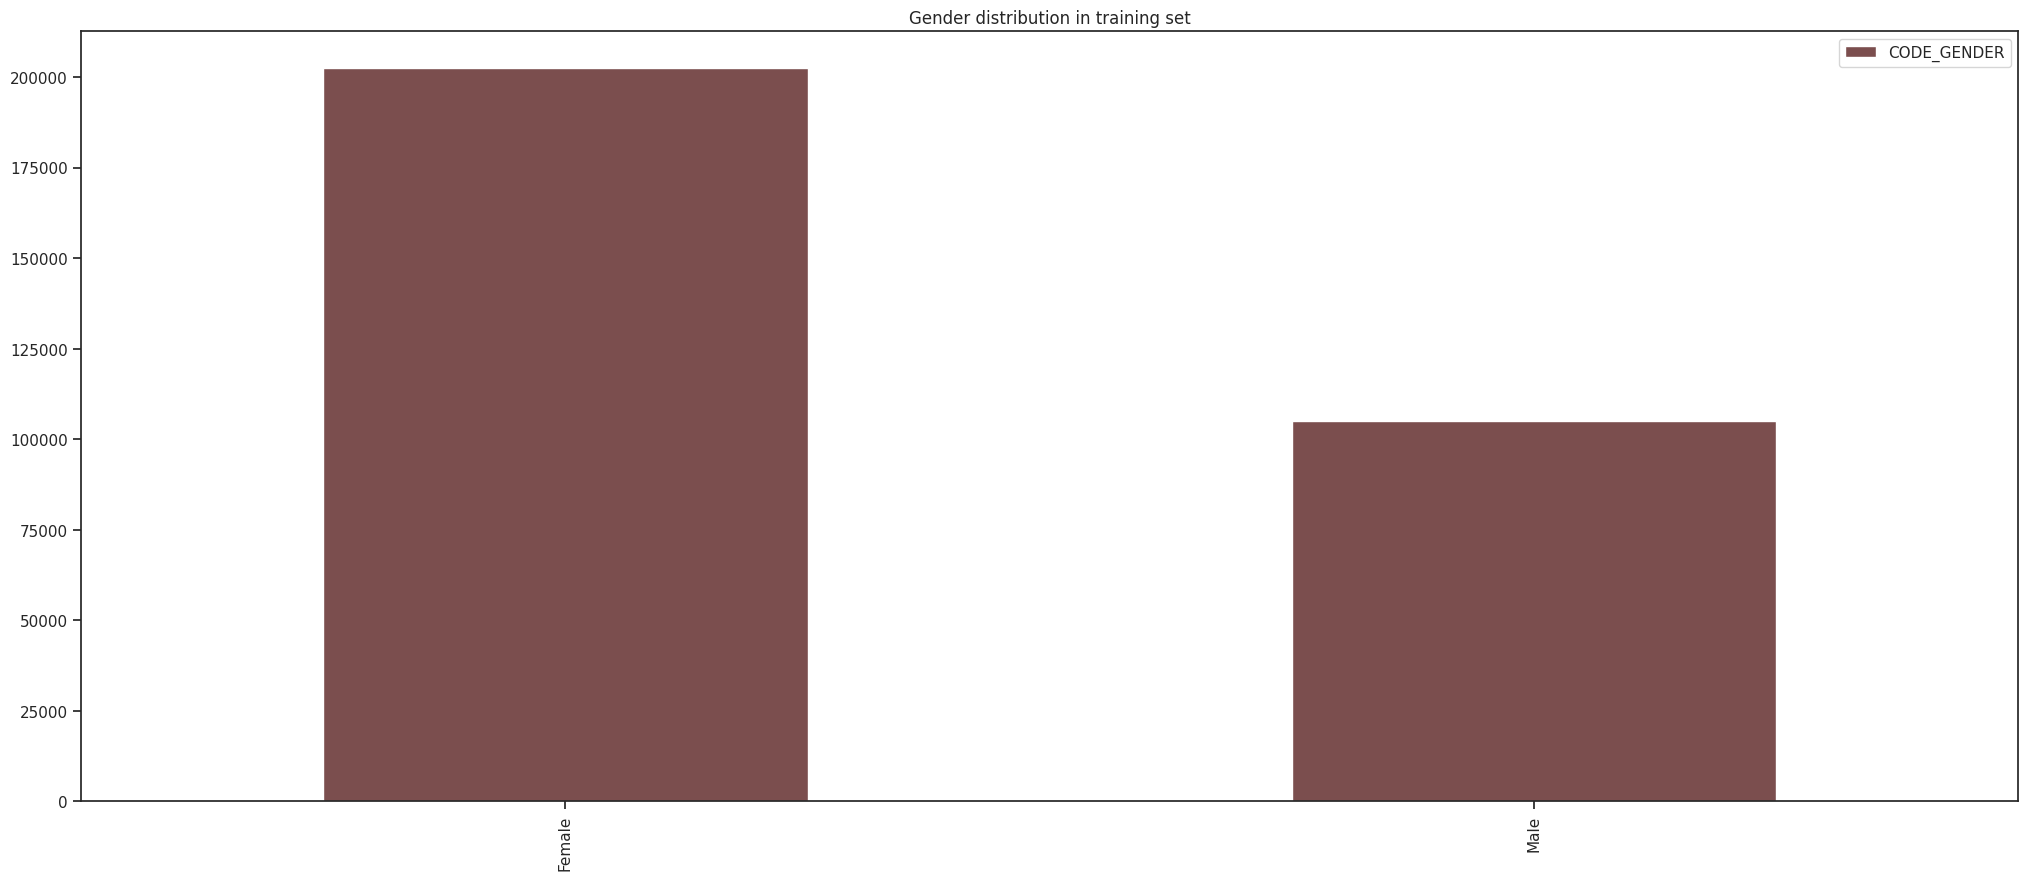

In [48]:
clean_X_train['CODE_GENDER'].value_counts().to_frame().plot(kind='bar', title='Gender distribution in training set')

<Axes: title={'center': 'Gender distribution in testing set'}>

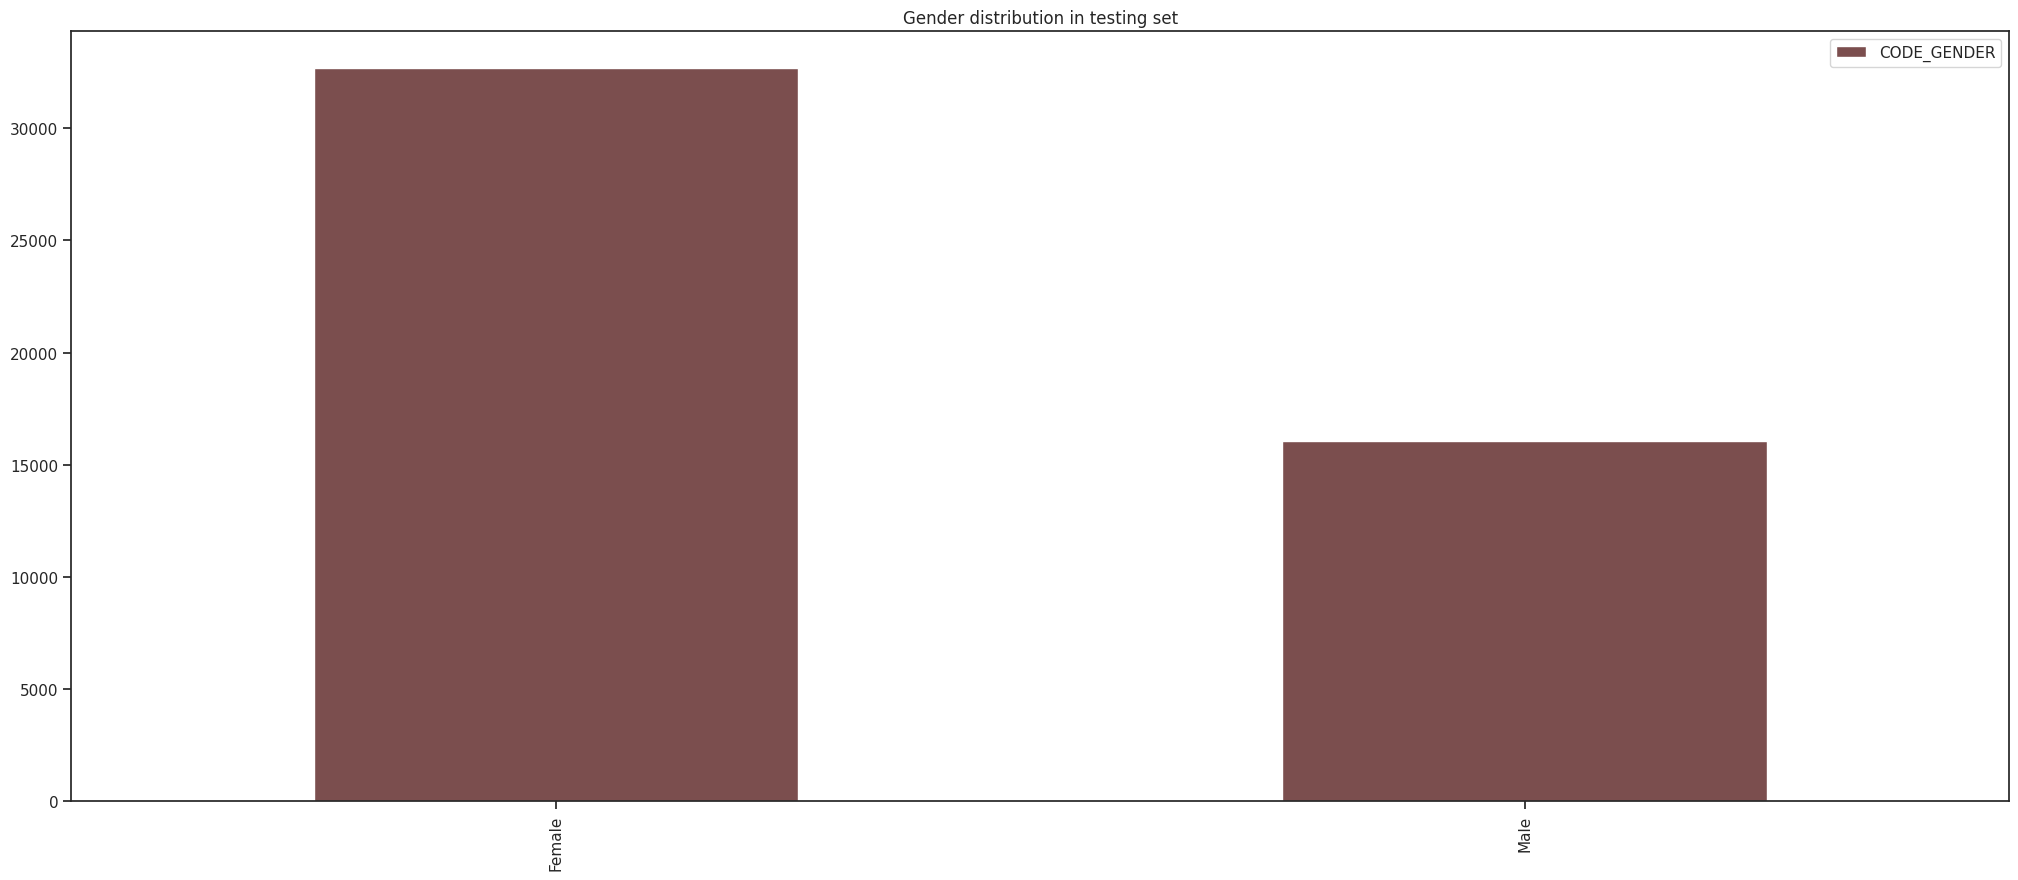

In [49]:
clean_X_test['CODE_GENDER'].value_counts().to_frame().plot(kind='bar', title='Gender distribution in testing set')

<Axes: title={'center': 'Car owners'}>

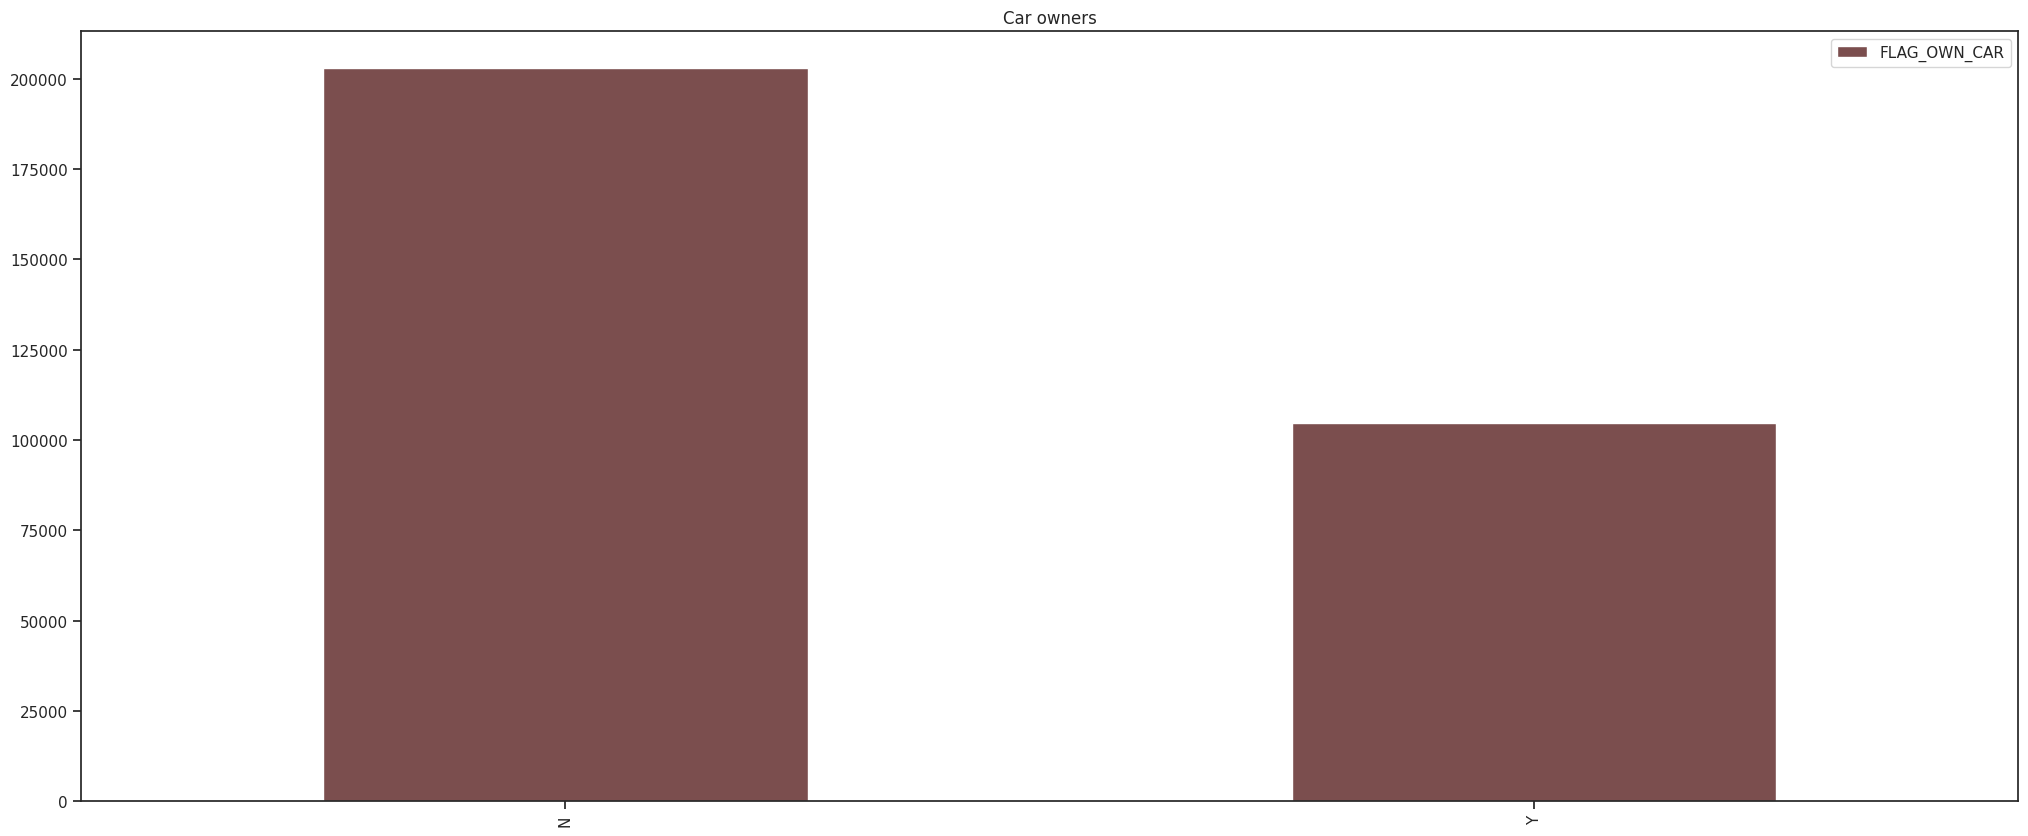

In [50]:
clean_X_train['FLAG_OWN_CAR'].value_counts().to_frame().plot(kind='bar', title='Car owners')

<Axes: title={'center': 'Car owners'}>

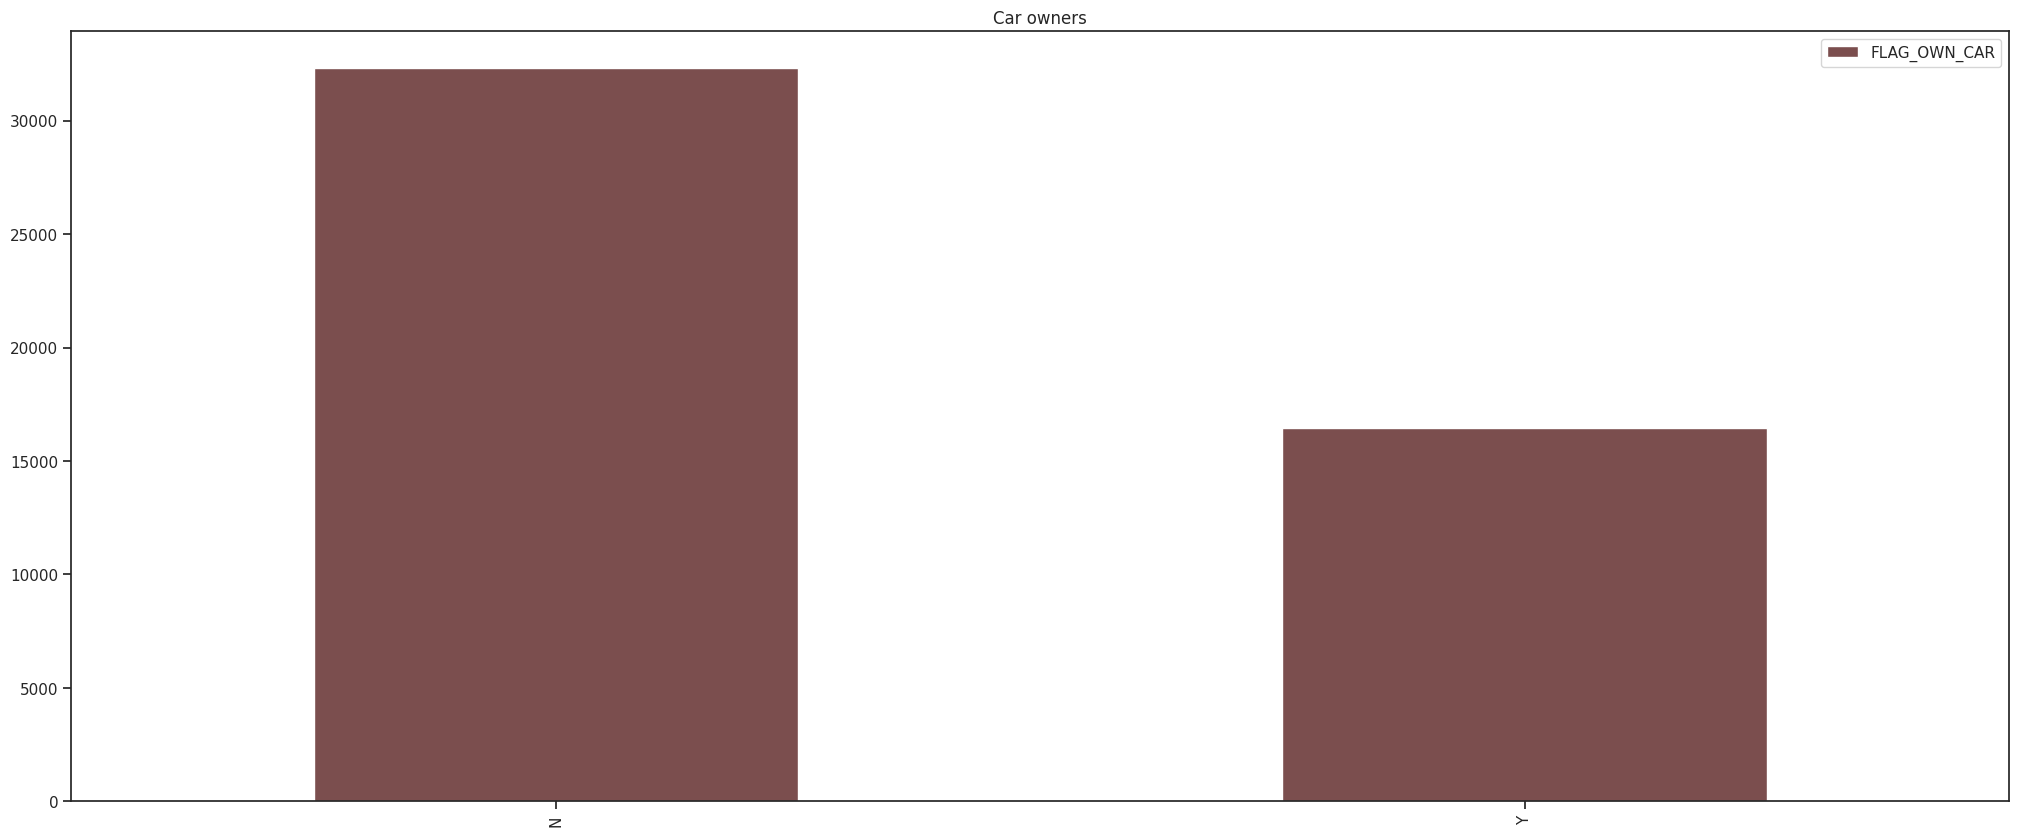

In [51]:
clean_X_test['FLAG_OWN_CAR'].value_counts().to_frame().plot(kind='bar', title='Car owners')

<Axes: title={'center': 'Appartment owners'}>

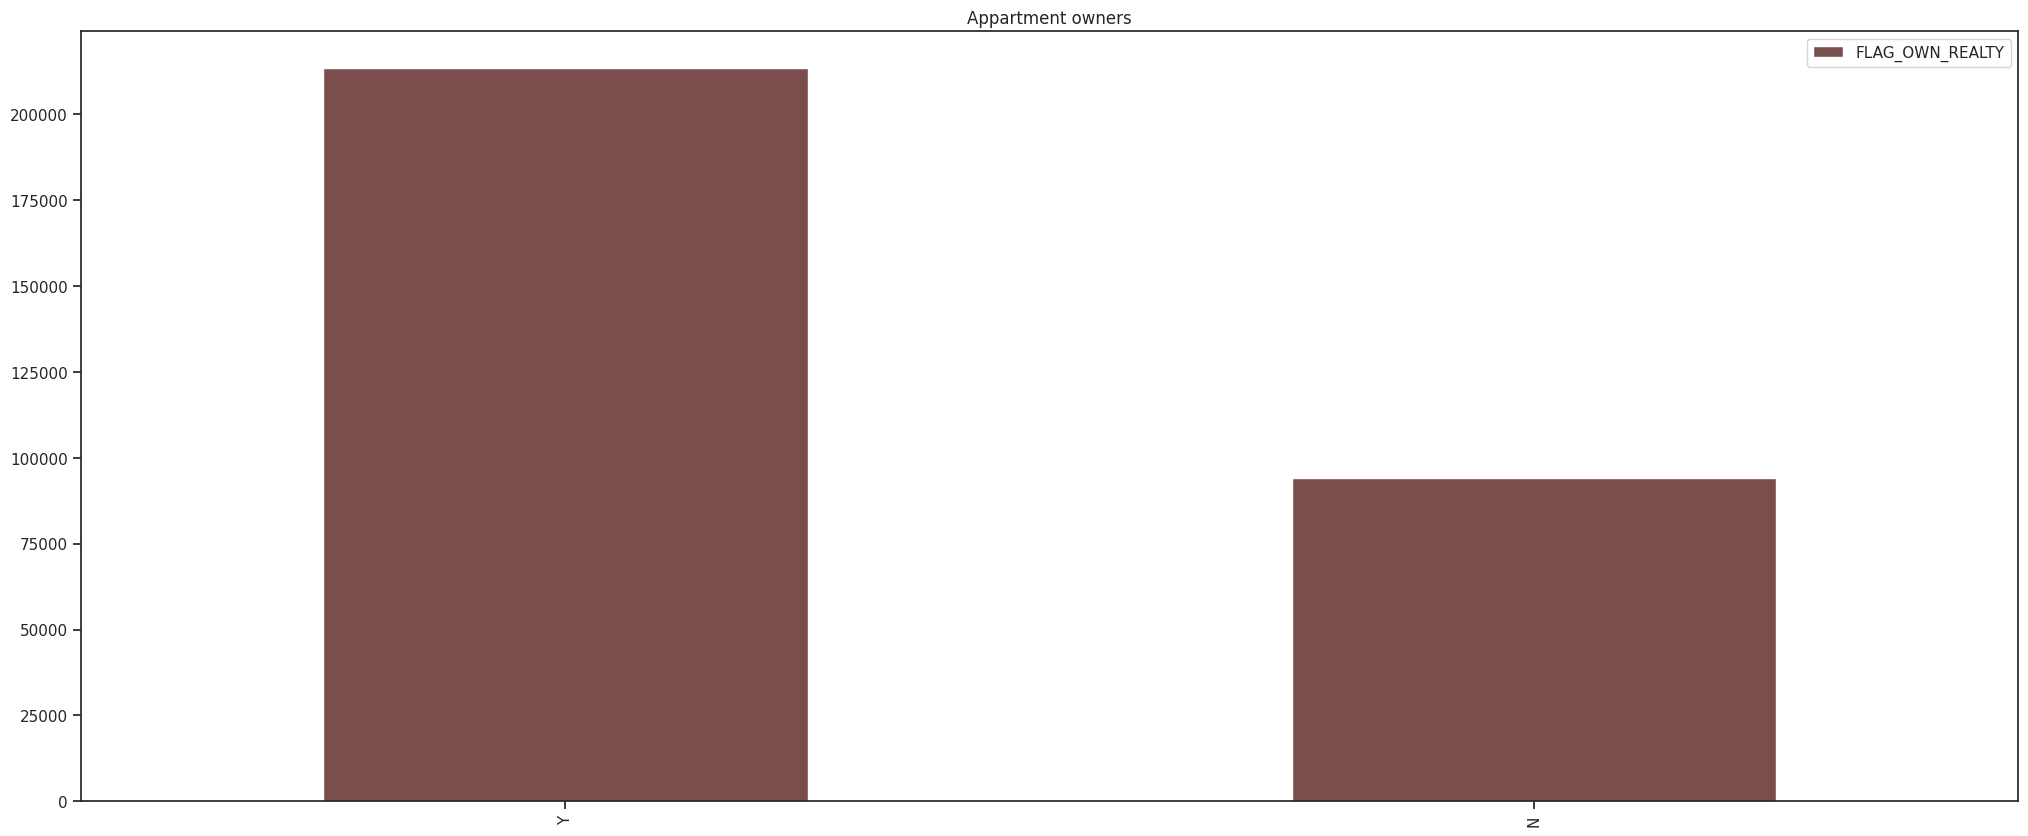

In [52]:
clean_X_train['FLAG_OWN_REALTY'].value_counts().to_frame().plot(kind='bar', title='Appartment owners')

<Axes: title={'center': 'Appartment owners'}>

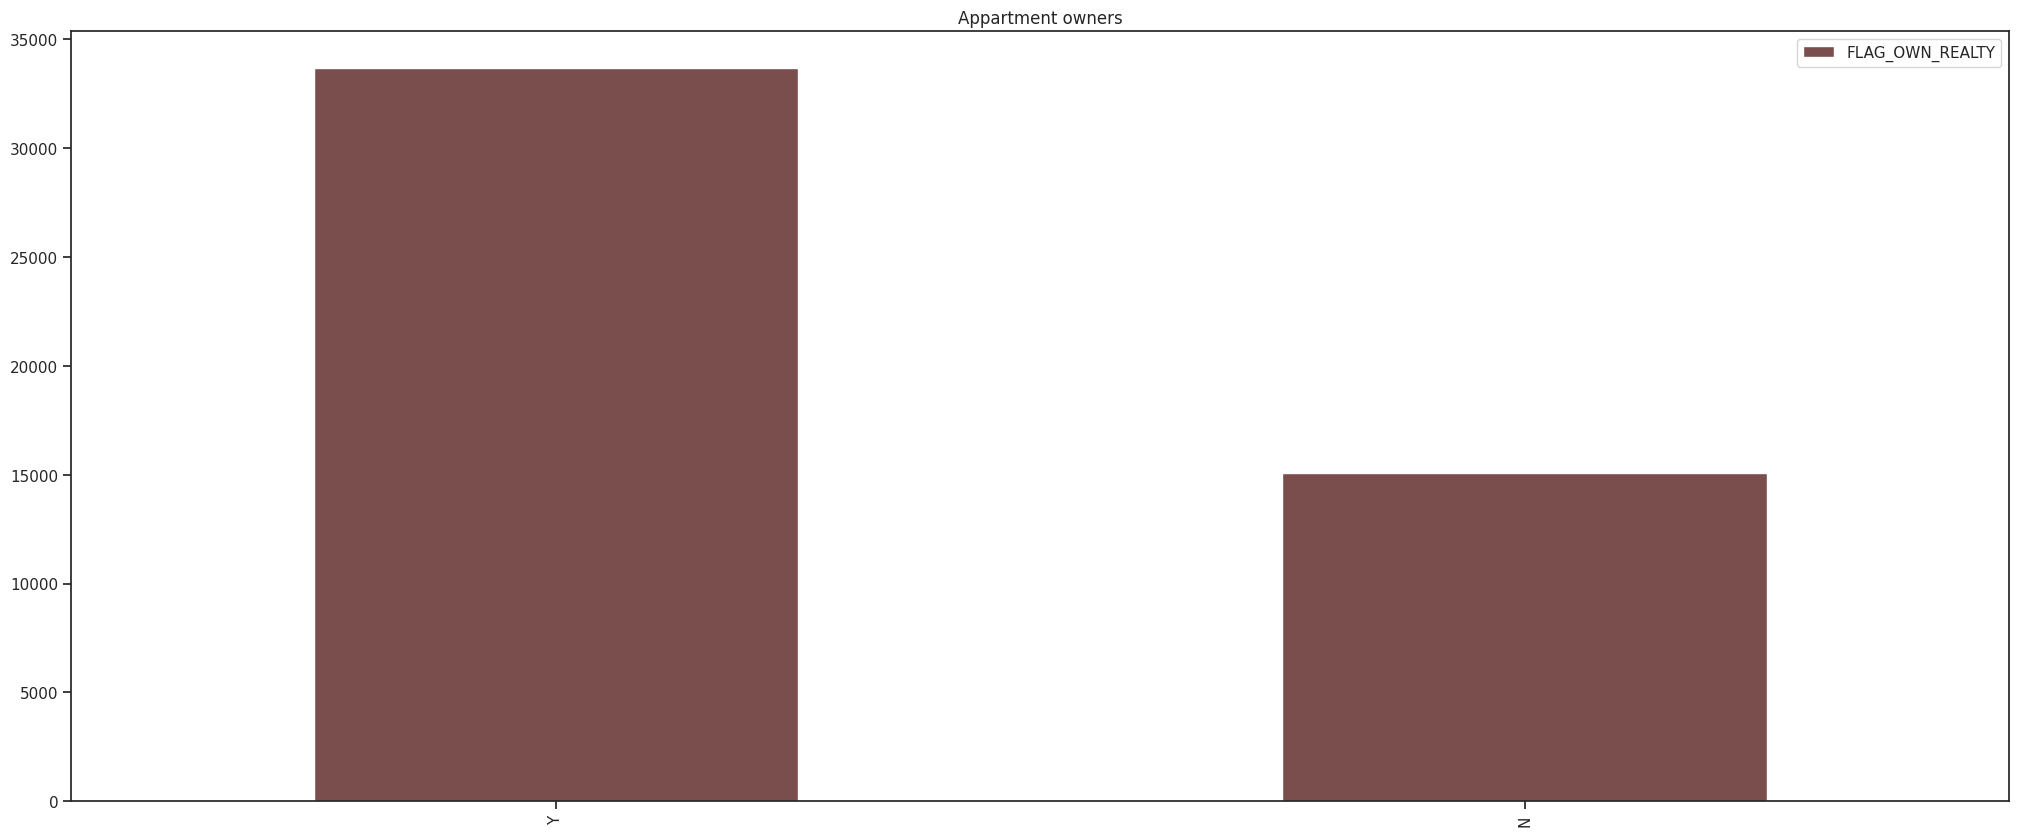

In [53]:
clean_X_test['FLAG_OWN_REALTY'].value_counts().to_frame().plot(kind='bar', title='Appartment owners')

In [54]:
clean_X_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [55]:
map_name_type_suite = {'Unaccompanied' : 'Unaccompanied',
                       'Family' : 'Family',
                       'Spouse, partner' : 'Family',
                       'Children' : 'Family',
                       'Other_A' : 'Others',
                       'Other_B' : 'Others',
                       'Group of people' : 'Others'}

clean_X_train['NAME_TYPE_SUITE'] = clean_X_train['NAME_TYPE_SUITE'].map(map_name_type_suite)

In [56]:
clean_X_test['NAME_TYPE_SUITE'] = clean_X_train['NAME_TYPE_SUITE'].map(map_name_type_suite)

<Axes: title={'center': 'Name type suite'}>

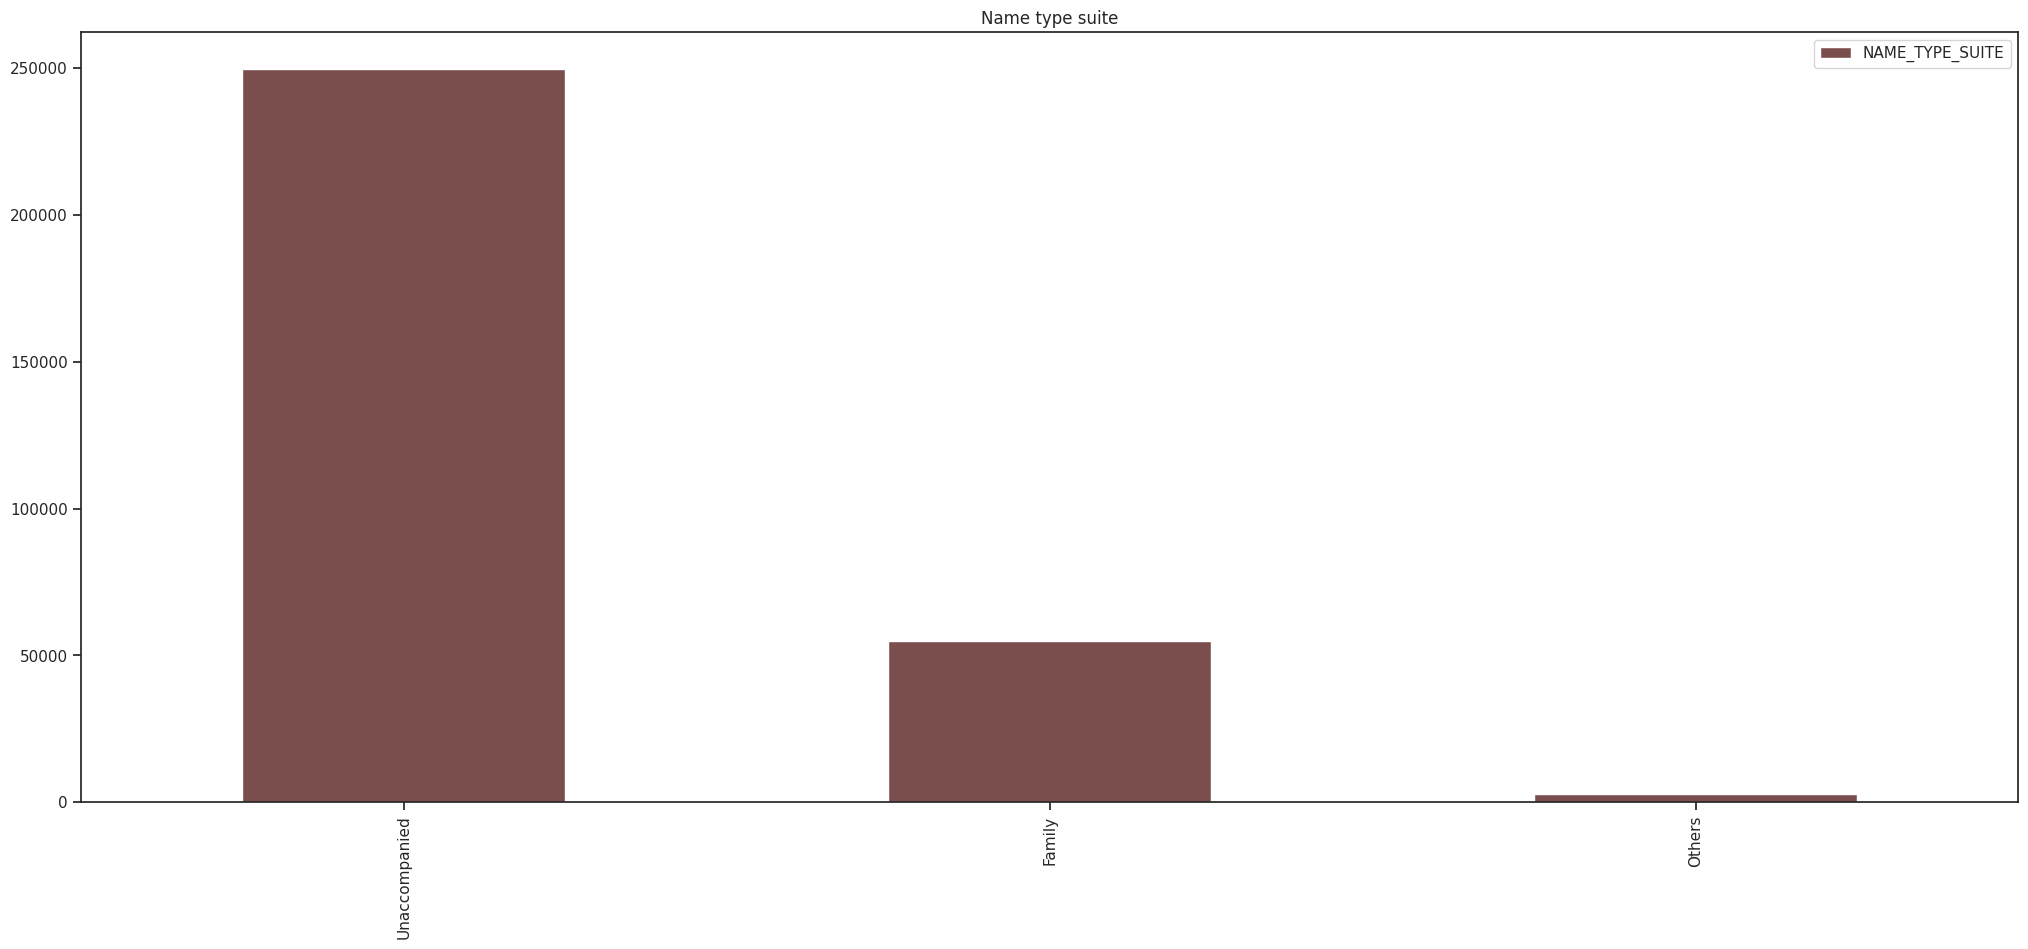

In [57]:
clean_X_train['NAME_TYPE_SUITE'].value_counts().to_frame().plot(kind='bar', title='Name type suite')

<Axes: title={'center': 'Name type suite'}>

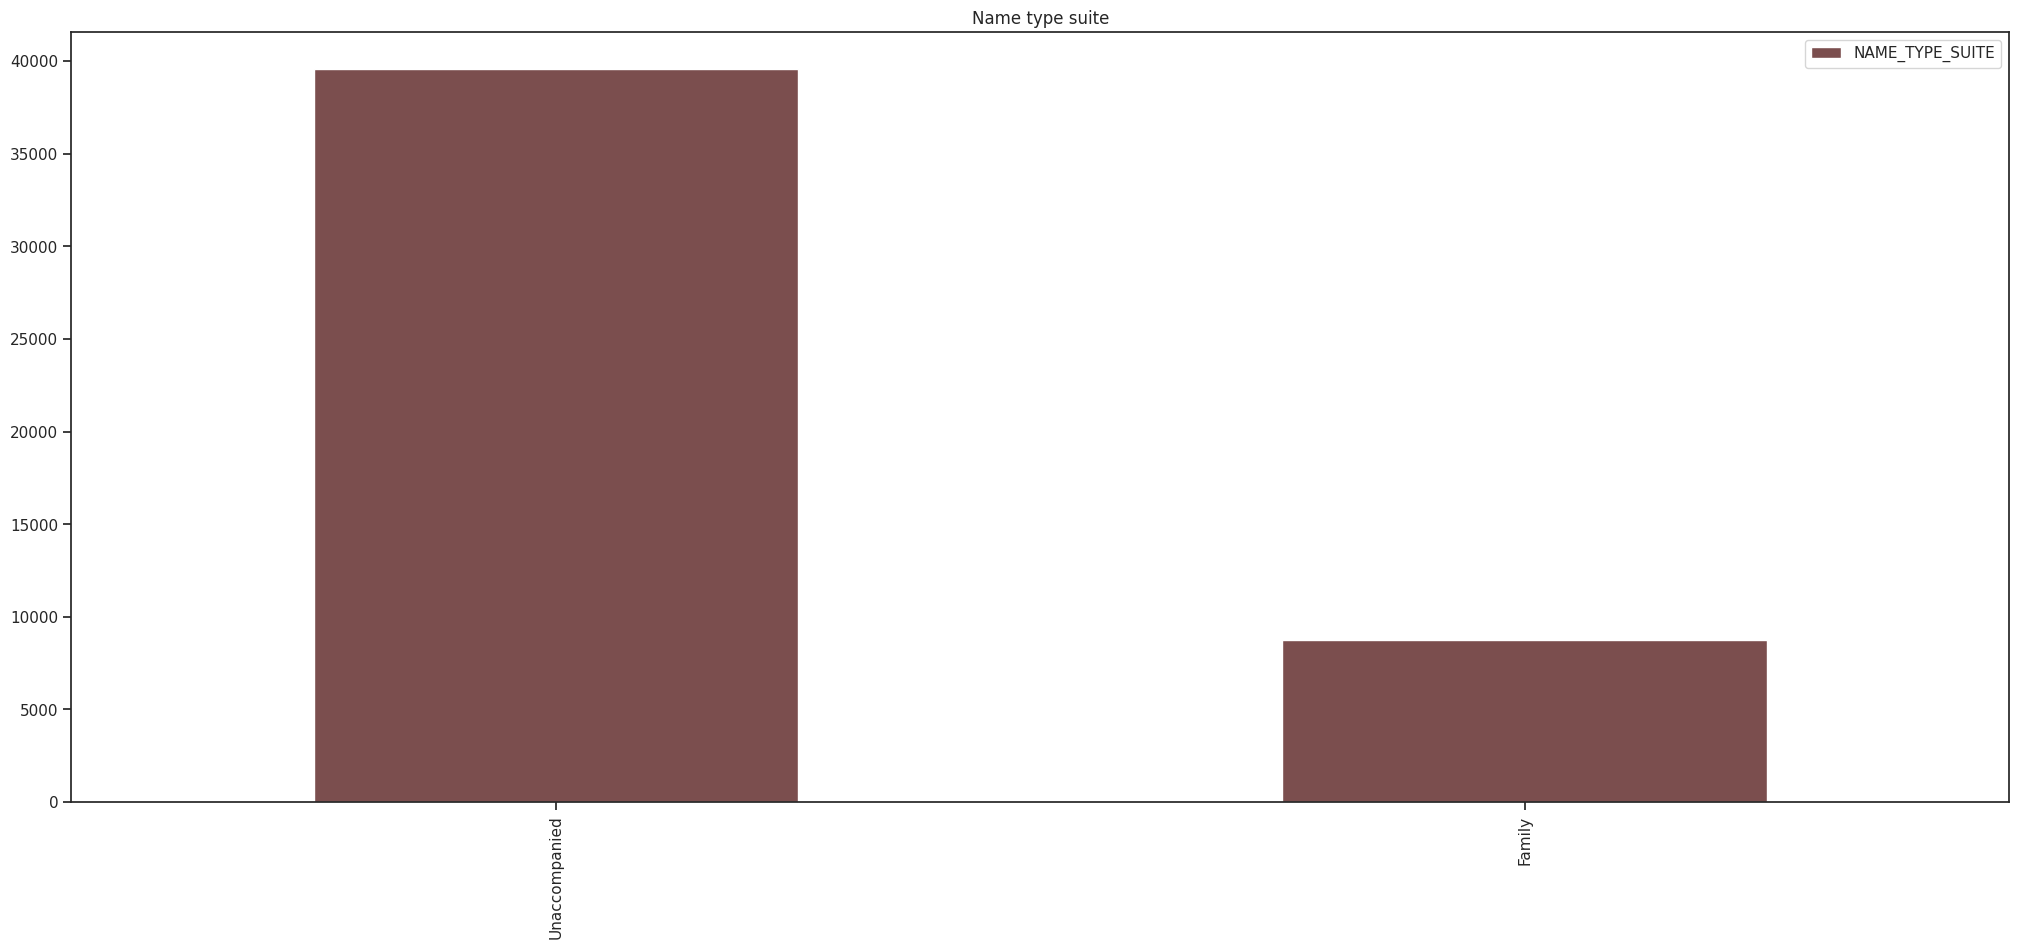

In [58]:
clean_X_test['NAME_TYPE_SUITE'].value_counts().to_frame().plot(kind='bar', title='Name type suite')

<Axes: title={'center': 'Name of income type'}>

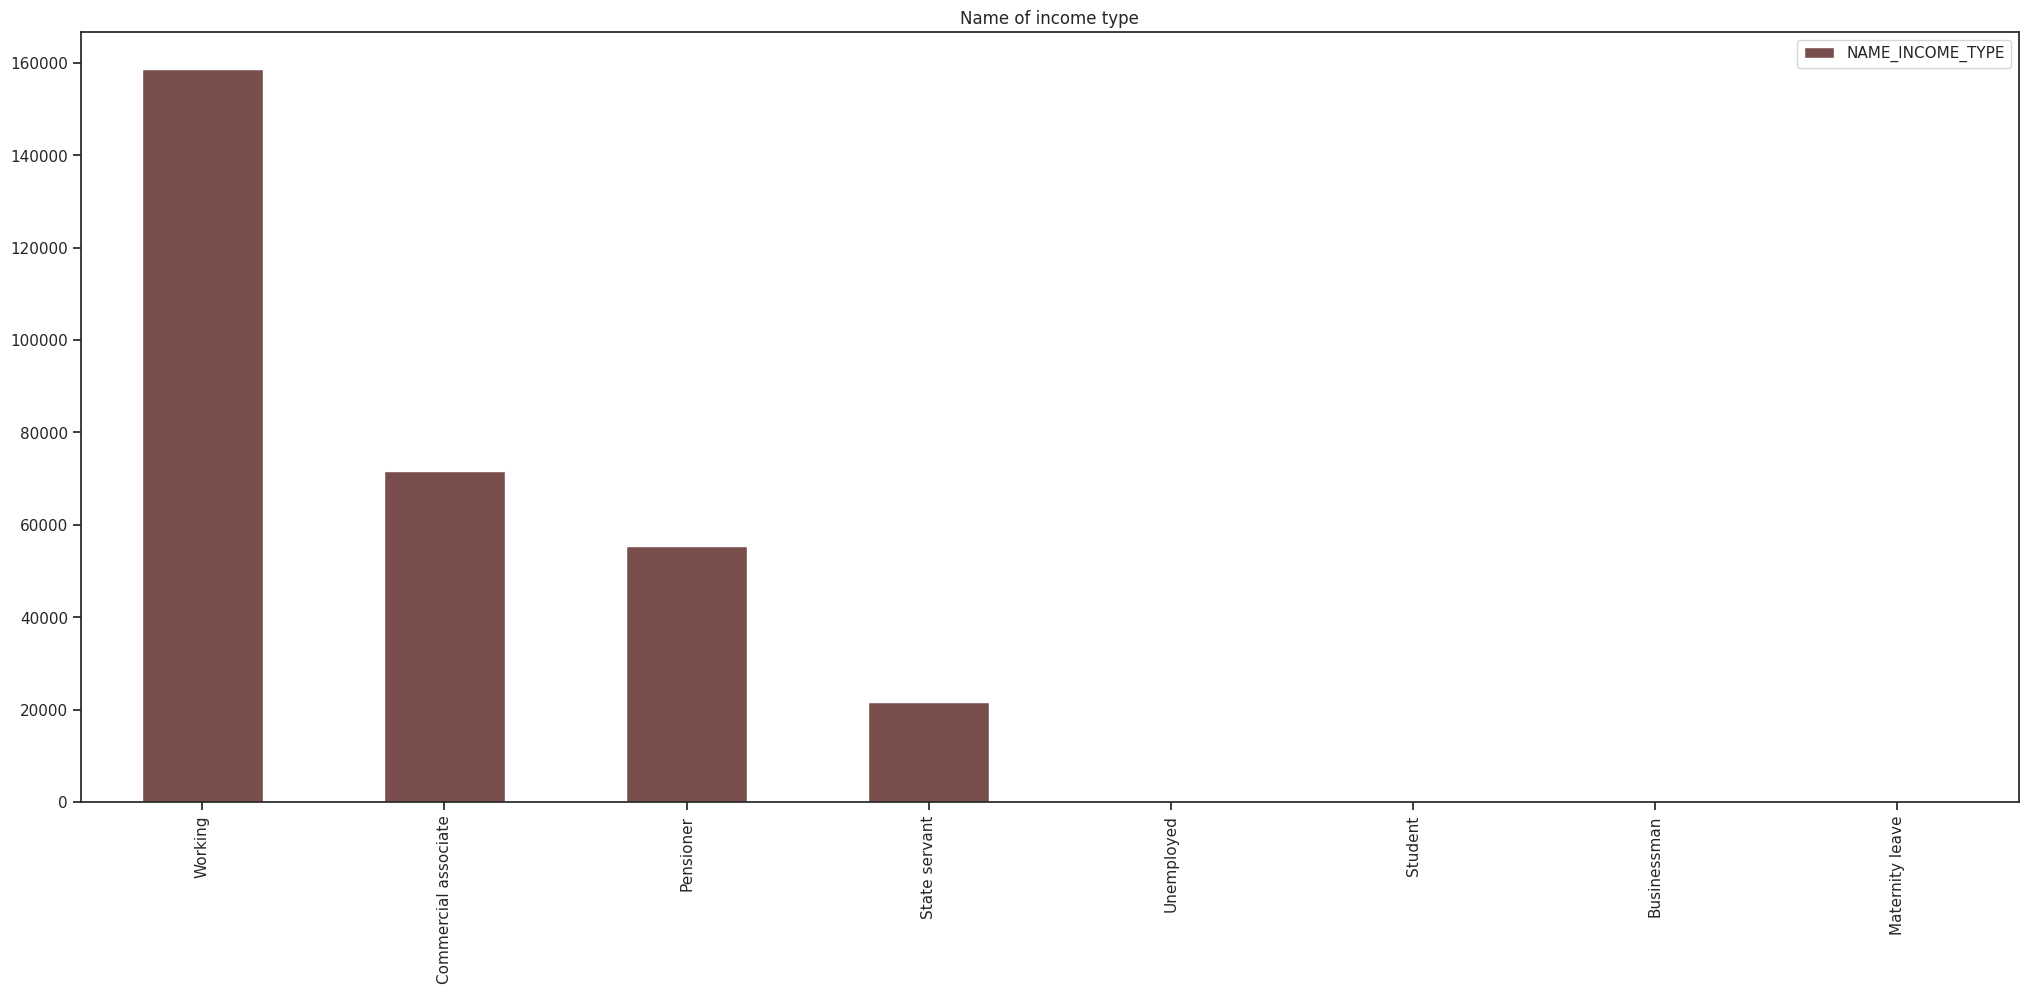

In [59]:
clean_X_train['NAME_INCOME_TYPE'].value_counts().to_frame().plot(kind='bar', title='Name of income type')

<Axes: title={'center': 'Name of income type'}>

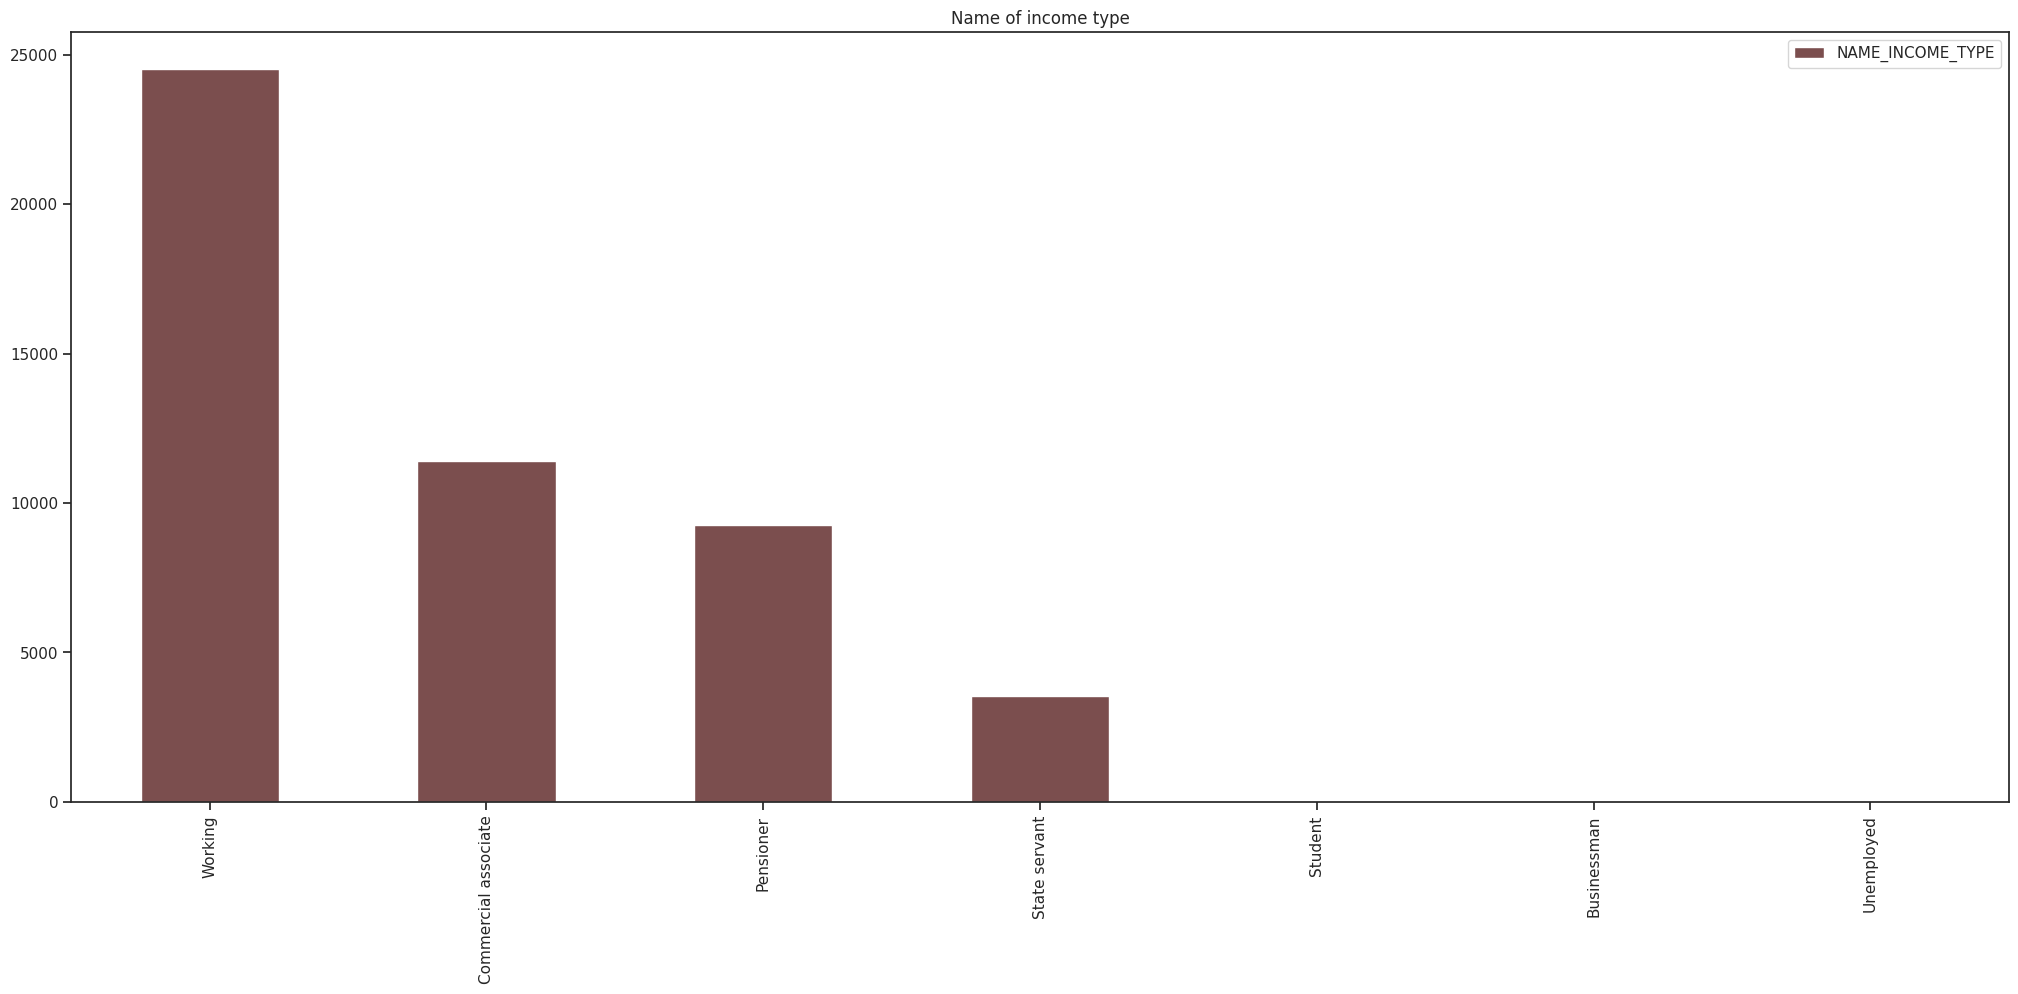

In [60]:
clean_X_test['NAME_INCOME_TYPE'].value_counts().to_frame().plot(kind='bar', title='Name of income type')

<Axes: title={'center': 'Name of education type'}>

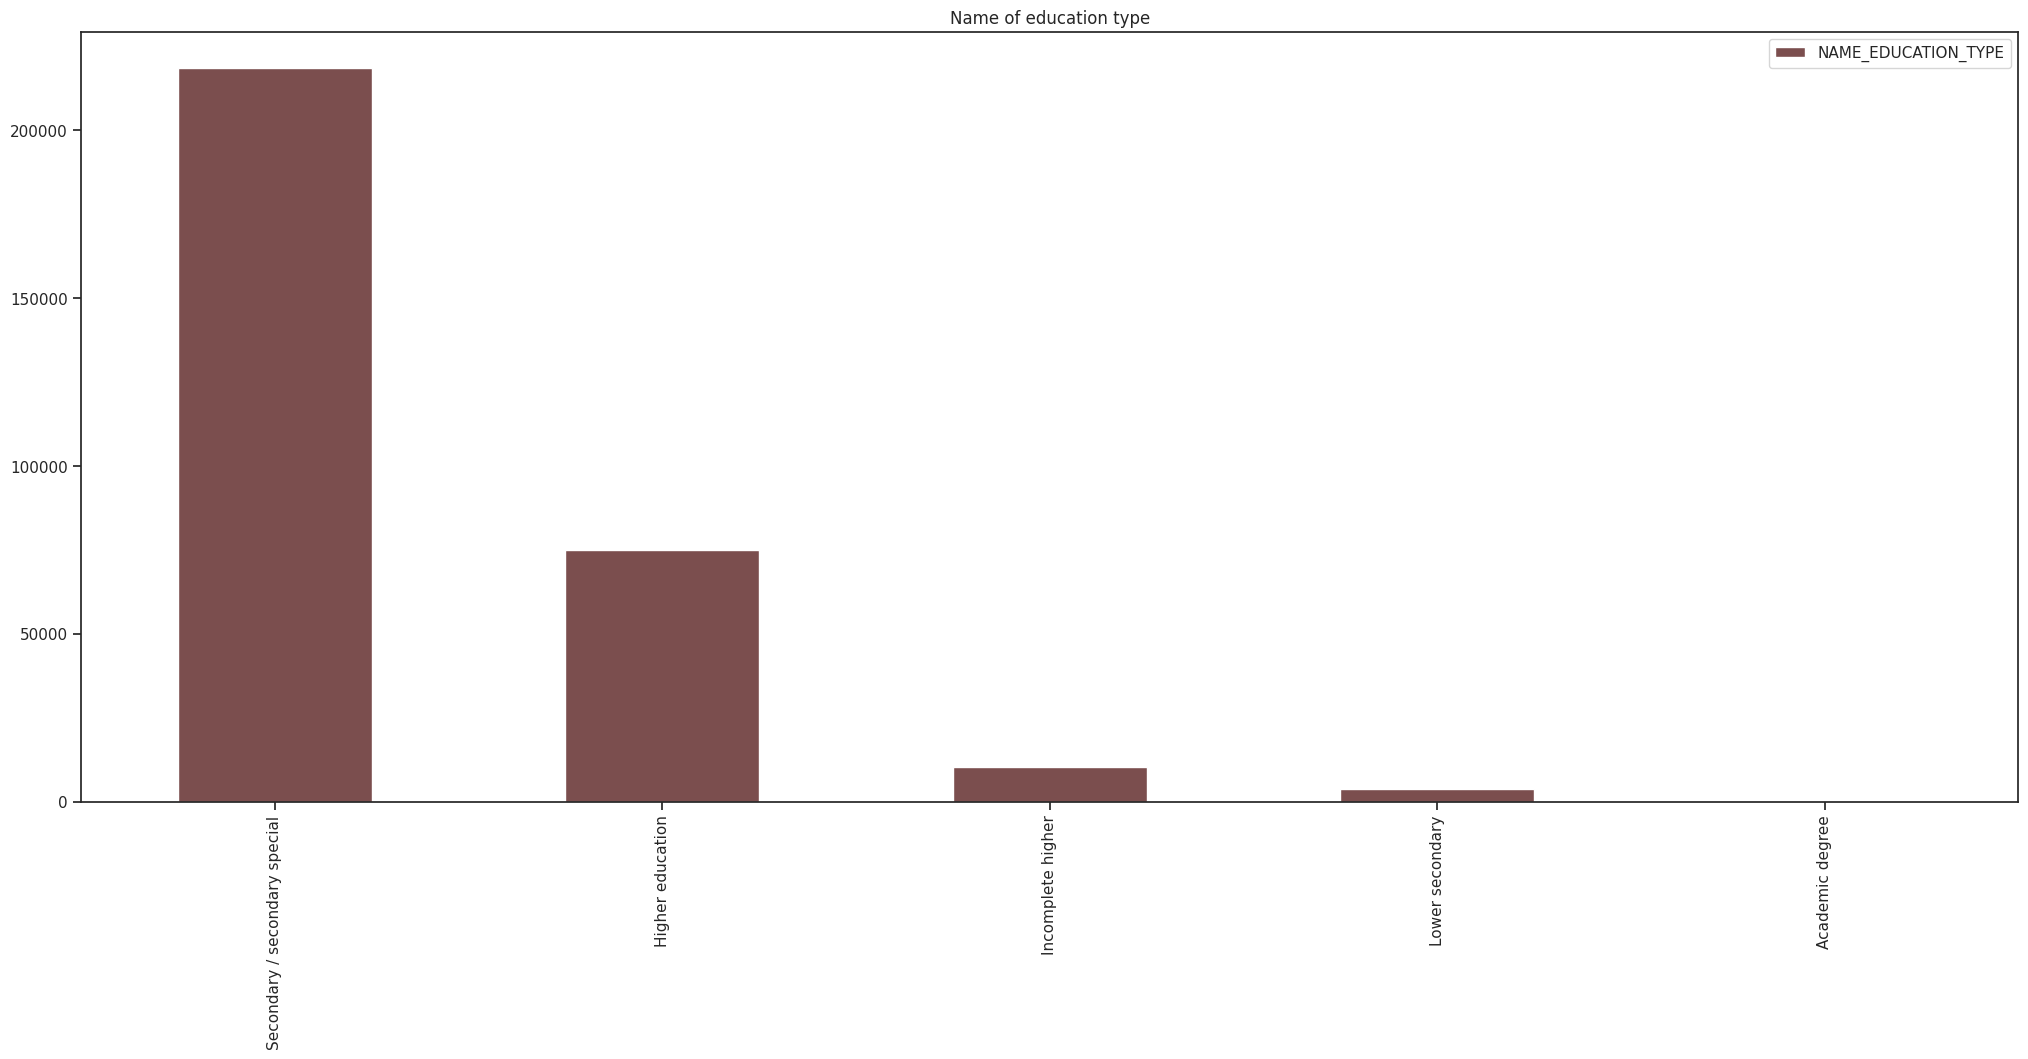

In [61]:
clean_X_train['NAME_EDUCATION_TYPE'].value_counts().to_frame().plot(kind='bar', title='Name of education type')

<Axes: title={'center': 'Name of education type'}>

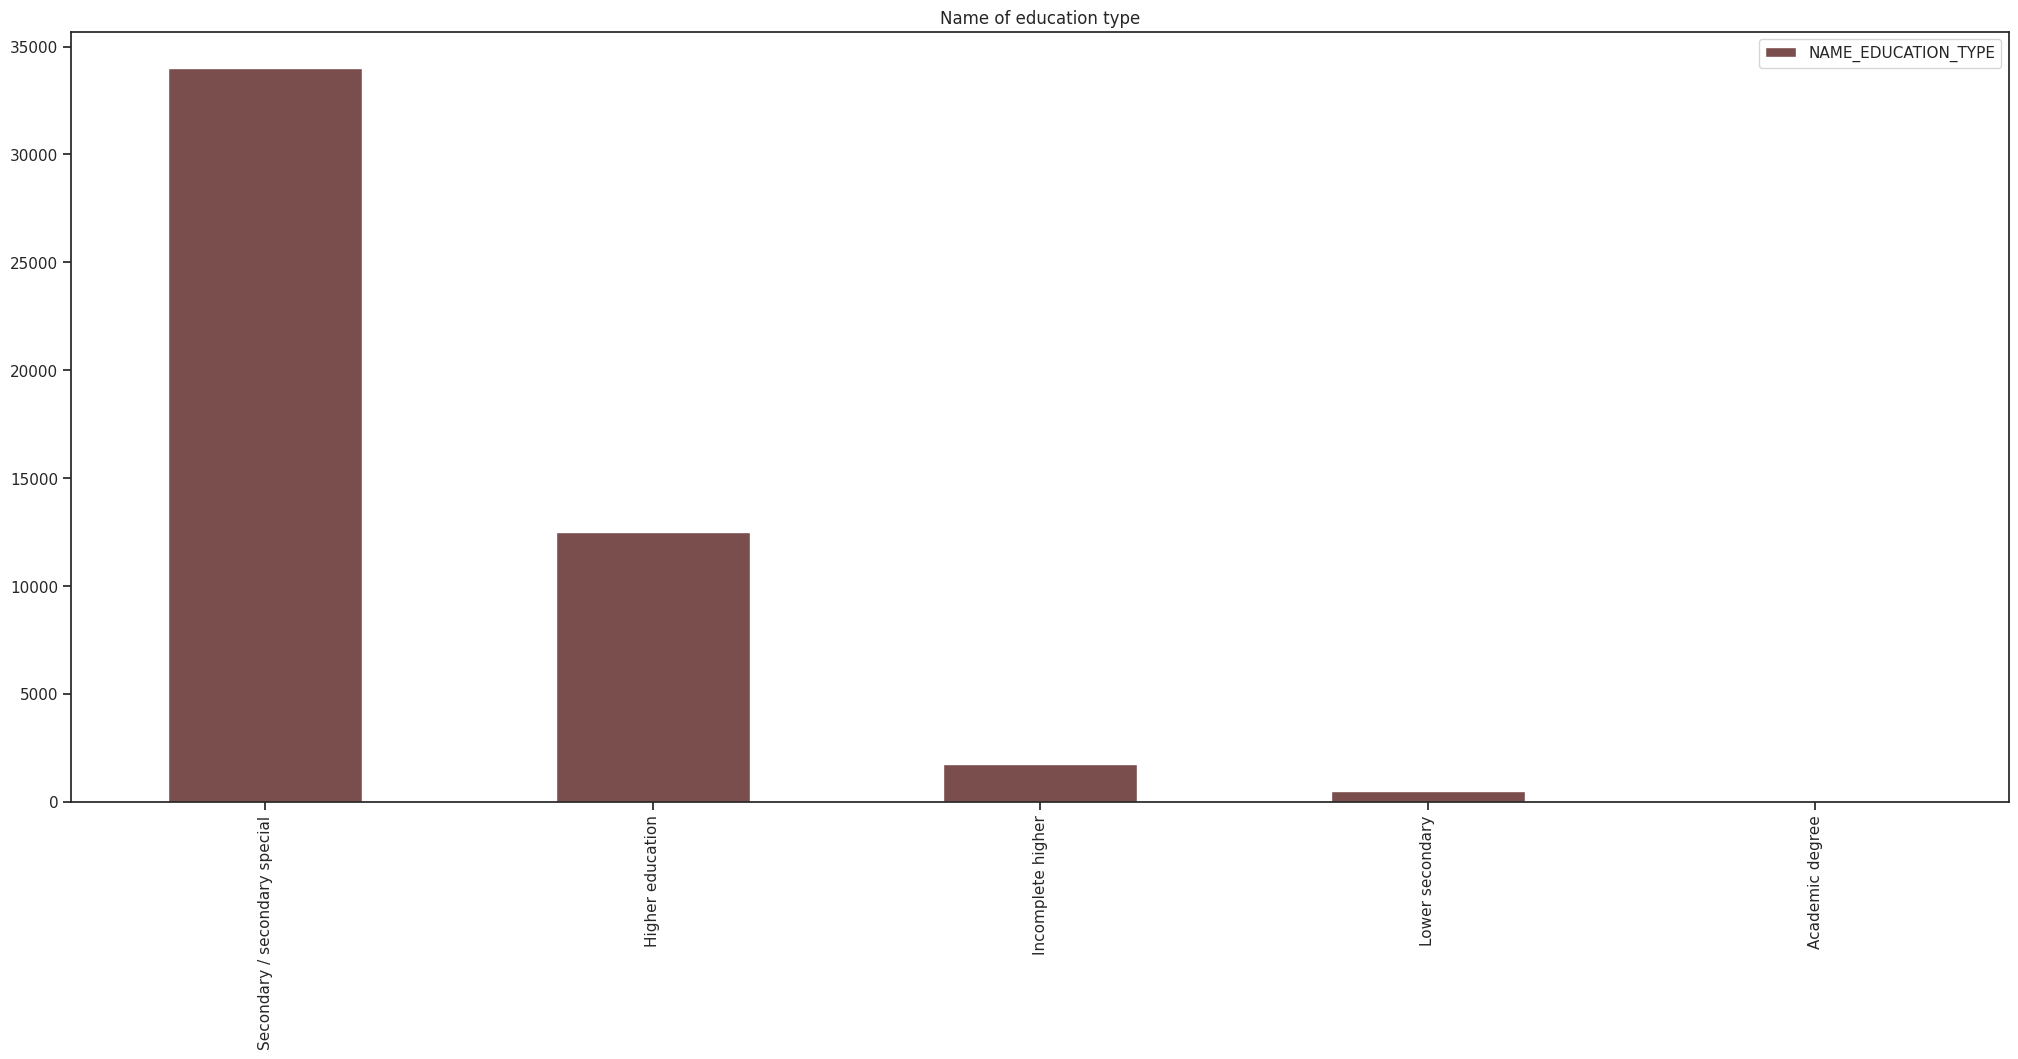

In [62]:
clean_X_test['NAME_EDUCATION_TYPE'].value_counts().to_frame().plot(kind='bar', title='Name of education type')

In [63]:
clean_X_train['ORGANIZATION_TYPE'].value_counts(normalize=True) * 100

Business Entity Type 3   22.11
XNA                      18.01
Self-employed            12.49
Other                     5.43
Medicine                  3.64
Business Entity Type 2    3.43
Government                3.38
School                    2.89
Trade: type 7             2.55
Kindergarten              2.24
Construction              2.19
Business Entity Type 1    1.95
Transport: type 4         1.76
Trade: type 3             1.14
Industry: type 9          1.10
Industry: type 3          1.07
Security                  1.06
Housing                   0.96
Industry: type 11         0.88
Military                  0.86
Bank                      0.82
Agriculture               0.80
Police                    0.76
Transport: type 2         0.72
Postal                    0.70
Security Ministries       0.64
Trade: type 2             0.62
Restaurant                0.59
Services                  0.51
University                0.43
Industry: type 7          0.43
Transport: type 3         0.39
Industry

In [64]:
clean_X_test['ORGANIZATION_TYPE'].value_counts(normalize=True) * 100

Business Entity Type 3   22.24
XNA                      19.03
Self-employed            12.15
Other                     5.55
Medicine                  3.52
Government                3.09
Business Entity Type 2    3.03
Trade: type 7             2.67
School                    2.64
Construction              2.13
Kindergarten              2.13
Business Entity Type 1    1.82
Transport: type 4         1.81
Trade: type 3             1.19
Military                  1.09
Industry: type 9          1.02
Industry: type 3          1.00
Security                  0.97
Transport: type 2         0.92
Police                    0.90
Housing                   0.89
Industry: type 11         0.85
Bank                      0.77
Security Ministries       0.70
Services                  0.62
Postal                    0.60
Agriculture               0.60
Restaurant                0.58
Trade: type 2             0.50
University                0.45
Industry: type 7          0.45
Industry: type 1          0.37
Transpor

In [65]:
clean_X_train.drop(labels='ORGANIZATION_TYPE', axis=1, inplace=True)
clean_X_test.drop(labels='ORGANIZATION_TYPE', axis=1, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 64), (48744, 63))

In [66]:
clean_X_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [67]:
map_name_contract_type = {"Cash loans" : "cash_loans",
                          "Revolving loans" : "revolving_loans"}

clean_X_train['NAME_CONTRACT_TYPE'] = clean_X_train['NAME_CONTRACT_TYPE'].map(map_name_contract_type)
clean_X_test['NAME_CONTRACT_TYPE'] = clean_X_test['NAME_CONTRACT_TYPE'].map(map_name_contract_type)

In [68]:
clean_X_train.to_csv(path+'checkpoint_1_train.csv')
clean_X_test.to_csv(path+'checkpoint_1_test.csv')

**save file to checkpoint_1**. Load from this file to continue analysis

In [69]:
clean_X_train = pd.read_csv(path+'checkpoint_1_train.csv')
clean_X_test = pd.read_csv(path+'checkpoint_1_test.csv')

clean_X_train.drop(columns=['Unnamed: 0'], inplace=True)
clean_X_test.drop(columns=['Unnamed: 0'], inplace=True)

In [70]:
clean_X_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_C

In [71]:
clean_X_train.select_dtypes(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START
0,cash_loans,Male,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY
1,cash_loans,Female,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY
2,revolving_loans,Male,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY
3,cash_loans,Female,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY
4,cash_loans,Male,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY
...,...,...,...,...,...,...,...,...,...,...
307506,cash_loans,Male,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,THURSDAY
307507,cash_loans,Female,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY
307508,cash_loans,Female,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,THURSDAY
307509,cash_loans,Female,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY


In [72]:
clean_X_train.select_dtypes(include=numerics).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FL

**Let's convert some numeric variables to categoric**

In [73]:
def map_children(num_children):
  if num_children == 0:
    return "No children"
  elif num_children == 1:
    return "Single child"
  else:
    return "Two or more children"

In [74]:
clean_X_train['CNT_CHILDREN'] = clean_X_train['CNT_CHILDREN'].apply(map_children)
clean_X_test['CNT_CHILDREN'] = clean_X_test['CNT_CHILDREN'].apply(map_children)

In [75]:
clean_X_train['FLAG_OWN_CAR'] = clean_X_train['FLAG_OWN_CAR'].apply(lambda x: 1 if x == "Y" else 0)
clean_X_test['FLAG_OWN_CAR'] = clean_X_test['FLAG_OWN_CAR'].apply(lambda x: 1 if x == "Y" else 0)

In [76]:
clean_X_train['FLAG_OWN_REALTY'] = clean_X_train['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == "Y" else 0)
clean_X_test['FLAG_OWN_REALTY'] = clean_X_test['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == "Y" else 0)

**Running a variance filter on FLAG columns**

In [77]:
flag_columns = []
for column in clean_X_train.columns:
  if column.startswith('FLAG'):
    flag_columns.append(column)

In [78]:
flag_df = clean_X_train[flag_columns]

In [79]:
for col in flag_df.columns:
  print(f"{col} has {clean_X_train[col].unique().shape[0]} unique values in train")
  print(f"{col} has {clean_X_test[col].unique().shape[0]} unique values in test")
  print("-------------")

FLAG_OWN_CAR has 2 unique values in train
FLAG_OWN_CAR has 2 unique values in test
-------------
FLAG_OWN_REALTY has 2 unique values in train
FLAG_OWN_REALTY has 2 unique values in test
-------------
FLAG_MOBIL has 2 unique values in train
FLAG_MOBIL has 2 unique values in test
-------------
FLAG_EMP_PHONE has 2 unique values in train
FLAG_EMP_PHONE has 2 unique values in test
-------------
FLAG_WORK_PHONE has 2 unique values in train
FLAG_WORK_PHONE has 2 unique values in test
-------------
FLAG_CONT_MOBILE has 2 unique values in train
FLAG_CONT_MOBILE has 2 unique values in test
-------------
FLAG_PHONE has 2 unique values in train
FLAG_PHONE has 2 unique values in test
-------------
FLAG_EMAIL has 2 unique values in train
FLAG_EMAIL has 2 unique values in test
-------------
FLAG_DOCUMENT_2 has 2 unique values in train
FLAG_DOCUMENT_2 has 1 unique values in test
-------------
FLAG_DOCUMENT_3 has 2 unique values in train
FLAG_DOCUMENT_3 has 2 unique values in test
-------------
FLAG_D

In [80]:
var_thr = VarianceThreshold(threshold=0.10) #Removing both constant and quasi-constant
var_thr.fit(clean_X_train[flag_columns])

var_thr.get_support()

array([ True,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [81]:
concol = [column for column in clean_X_train[flag_columns].columns
          if column not in clean_X_train[flag_columns].columns[var_thr.get_support()]]

for features in concol:
    print(features)

FLAG_MOBIL
FLAG_CONT_MOBILE
FLAG_EMAIL
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21


In [82]:
# Let's drop these quasi constant variables from train and test
clean_X_train.drop(columns=concol, inplace=True)
clean_X_test.drop(columns=concol, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 42), (48744, 41))

In [83]:
clean_X_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FL

In [84]:
map_family_status = {
    "Married": "married",
    "Single / not married": "not married",
    "Civil marriage": "married",
    "Separated": "not married",
    "Widow": "not married",
    "Unknown": "not married"
}

In [85]:
clean_X_train['NAME_FAMILY_STATUS'] = clean_X_train['NAME_FAMILY_STATUS'].map(map_family_status)

In [86]:
clean_X_test['NAME_FAMILY_STATUS'] = clean_X_test['NAME_FAMILY_STATUS'].map(map_family_status)

In [87]:
map_housing = {
    "House / apartment": "independent",
    "With parents": "dependent",
    "Munipal apartment": "independent",
    "Rented apartment": "independent",
    "Office apartment": "independent",
    "Co-op apartment": "independent"
}

In [88]:
clean_X_train['NAME_HOUSING_TYPE'] = clean_X_train['NAME_HOUSING_TYPE'].map(map_housing)
clean_X_test['NAME_HOUSING_TYPE'] = clean_X_test['NAME_HOUSING_TYPE'].map(map_housing)

In [89]:
clean_X_train['REGION_POPULATION_RELATIVE'].value_counts()

0.04    16408
0.05    13442
0.03    12163
0.03    11950
0.03    11601
        ...  
0.00      467
0.00      235
0.00       39
0.00       28
0.00        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [90]:
def map_family_members(fam_mem):
  if fam_mem == 1:
    return "one"
  elif fam_mem == 2:
    return "two"
  else:
    return "more than two"

In [91]:
clean_X_train['CNT_FAM_MEMBERS'] = clean_X_train['CNT_FAM_MEMBERS'].apply(map_family_members)
clean_X_test['CNT_FAM_MEMBERS'] = clean_X_test['CNT_FAM_MEMBERS'].apply(map_family_members)
clean_X_train['CNT_FAM_MEMBERS'].value_counts()

two              158359
more than two     81305
one               67847
Name: CNT_FAM_MEMBERS, dtype: int64

In [92]:
columns_description[columns_description['Row'] == 'AMT_CREDIT']['Description']

8                              Credit amount of the loan
178    Final credit amount on the previous applicatio...
Name: Description, dtype: object

In [93]:
clean_X_train.select_dtypes(include=numerics)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,1,0,1,"202,500.00","406,597.50","24,700.50","351,000.00",0.02,-9461,...,0,0,0,0.26,2.00,2.00,2.00,2.00,"-1,134.00",1
1,100003,0,0,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",0.00,-16765,...,0,0,0,0.62,1.00,0.00,1.00,0.00,-828.00,1
2,100004,0,1,1,"67,500.00","135,000.00","6,750.00","135,000.00",0.01,-19046,...,0,0,0,0.56,0.00,0.00,0.00,0.00,-815.00,0
3,100006,0,0,1,"135,000.00","312,682.50","29,686.50","297,000.00",0.01,-19005,...,0,0,0,0.65,2.00,0.00,2.00,0.00,-617.00,1
4,100007,0,0,1,"121,500.00","513,000.00","21,865.50","513,000.00",0.03,-19932,...,0,1,1,0.32,0.00,0.00,0.00,0.00,"-1,106.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,"157,500.00","254,700.00","27,558.00","225,000.00",0.03,-9327,...,0,0,0,0.68,0.00,0.00,0.00,0.00,-273.00,0
307507,456252,0,0,1,"72,000.00","269,550.00","12,001.50","225,000.00",0.03,-20775,...,0,0,0,0.12,0.00,0.00,0.00,0.00,0.00,1
307508,456253,0,0,1,"153,000.00","677,664.00","29,979.00","585,000.00",0.01,-14966,...,0,1,1,0.54,6.00,0.00,6.00,0.00,"-1,909.00",1
307509,456254,1,0,1,"171,000.00","370,107.00","20,205.00","319,500.00",0.01,-11961,...,1,1,0,0.51,0.00,0.00,0.00,0.00,-322.00,1


In [94]:
list1 = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

flag_map = {1 : "different address",
            0 : "same address"}

for var in list1:
    clean_X_train[var] = clean_X_train[var].map(flag_map)

In [95]:
for var in list1:
  clean_X_test[var] = clean_X_test[var].map(flag_map)

In [96]:
clean_X_train['DAYS_BIRTH'] = round(clean_X_train['DAYS_BIRTH'] / -365, 0)

In [97]:
pd.qcut(clean_X_train.DAYS_BIRTH, q=5).head(7)

0    (20.999, 32.0]
1      (39.0, 47.0]
2      (47.0, 56.0]
3      (47.0, 56.0]
4      (47.0, 56.0]
5      (39.0, 47.0]
6      (32.0, 39.0]
Name: DAYS_BIRTH, dtype: category
Categories (5, interval[float64, right]): [(20.999, 32.0] < (32.0, 39.0] < (39.0, 47.0] <
                                           (47.0, 56.0] < (56.0, 69.0]]

In [98]:
clean_X_train['client_age'] = pd.qcut(clean_X_train.DAYS_BIRTH,
                                         q=5,
                                         labels=['32_and_below',
                                                 '33_to_39',
                                                 '40_to_47',
                                                 '48_to_56',
                                                 '57_and_above'])

clean_X_train['client_age'].value_counts()

32_and_below    65203
40_to_47        63722
48_to_56        61956
57_and_above    58796
33_to_39        57834
Name: client_age, dtype: int64

In [99]:
clean_X_test['DAYS_BIRTH'] = round(clean_X_test['DAYS_BIRTH'] / -365, 0)

In [100]:
clean_X_test['client_age'] = pd.cut(clean_X_test.DAYS_BIRTH,
                                    bins=[1,
                                          32,
                                          39,
                                          47,
                                          56,
                                          100],
                                    include_lowest=True,
                                    labels=['32_and_below',
                                            '33_to_39',
                                            '40_to_47',
                                            '48_to_46',
                                            '57_and_above'])

clean_X_test['client_age'].value_counts()

40_to_47        10360
32_and_below    10037
48_to_46         9880
57_and_above     9240
33_to_39         9227
Name: client_age, dtype: int64

In [101]:
clean_X_train.drop(labels='DAYS_BIRTH',
                   axis=1, inplace=True)

clean_X_test.drop(labels='DAYS_BIRTH',
                  axis=1, inplace=True)

In [102]:
clean_X_train['DAYS_ID_PUBLISH'] = round(clean_X_train['DAYS_ID_PUBLISH'] / -365, 0)
pd.qcut(clean_X_train.DAYS_ID_PUBLISH, q=4).head(7)

0       (5.0, 9.0]
1    (-0.001, 5.0]
2       (5.0, 9.0]
3       (5.0, 9.0]
4       (5.0, 9.0]
5    (-0.001, 5.0]
6    (-0.001, 5.0]
Name: DAYS_ID_PUBLISH, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 5.0] < (5.0, 9.0] < (9.0, 12.0] < (12.0, 20.0]]

In [103]:
clean_X_train['id_last_renewed'] = pd.qcut(clean_X_train.DAYS_ID_PUBLISH,
                                          q=4,
                                          labels=['5_and_less',
                                                  '6_to_9',
                                                  '10_to_12',
                                                  '13_and_more'])

clean_X_train['id_last_renewed'].value_counts()

10_to_12       95606
5_and_less     90536
6_to_9         74664
13_and_more    46705
Name: id_last_renewed, dtype: int64

In [104]:
clean_X_test['DAYS_ID_PUBLISH'] = round(clean_X_test['DAYS_ID_PUBLISH'] / -365, 0)
clean_X_test['id_last_renewed'] = pd.cut(clean_X_test.DAYS_ID_PUBLISH,
                                        bins=[-1,
                                              5,
                                              9,
                                              12,
                                              100],
                                        include_lowest=True,
                                        labels=['5_and_less',
                                                '6_to_9',
                                                '10_to_12',
                                                '13_and_more'])

clean_X_test['id_last_renewed'].value_counts()

5_and_less     14394
10_to_12       12585
6_to_9         11633
13_and_more    10132
Name: id_last_renewed, dtype: int64

In [105]:
clean_X_train.drop(labels='DAYS_ID_PUBLISH',
                   axis=1, inplace=True)
clean_X_test.drop(labels='DAYS_ID_PUBLISH',
                  axis=1, inplace=True)

In [106]:
clean_X_train['DAYS_REGISTRATION'] = round(clean_X_train['DAYS_REGISTRATION'] / -365, 0)
pd.qcut(clean_X_train.DAYS_REGISTRATION, q=5).head(7)

0      (4.0, 10.0]
1    (-0.001, 4.0]
2     (10.0, 15.0]
3     (23.0, 68.0]
4     (10.0, 15.0]
5     (10.0, 15.0]
6    (-0.001, 4.0]
Name: DAYS_REGISTRATION, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 4.0] < (4.0, 10.0] < (10.0, 15.0] < (15.0, 23.0] <
                                           (23.0, 68.0]]

In [107]:
clean_X_train['registration_last_change'] = pd.qcut(clean_X_train.DAYS_REGISTRATION,
                                             q=5,
                                             labels=['4_or_less',
                                                     '5_to_10',
                                                     '11_to_15',
                                                     '16_to_23',
                                                     '24_or_more'])

clean_X_train['registration_last_change'].value_counts()

4_or_less     66128
5_to_10       65157
16_to_23      63448
11_to_15      58100
24_or_more    54678
Name: registration_last_change, dtype: int64

In [108]:
clean_X_test['DAYS_REGISTRATION'] = round(clean_X_test['DAYS_REGISTRATION'] / -365, 0)

In [109]:
clean_X_test['registration_last_change'] = pd.cut(clean_X_test.DAYS_REGISTRATION,
                                           bins=[-1,
                                                 4,
                                                 10,
                                                 15,
                                                 23,
                                                 100],
                                           include_lowest=True,
                                           labels=['4_or_less',
                                                   '5_to_10',
                                                   '11_to_15',
                                                   '16_to_23',
                                                   '24_or_more'])

clean_X_test['registration_last_change'].value_counts()

4_or_less     10935
5_to_10       10252
16_to_23       9801
11_to_15       9027
24_or_more     8729
Name: registration_last_change, dtype: int64

In [110]:
clean_X_train.drop(labels='DAYS_REGISTRATION',
                   axis=1, inplace=True)

clean_X_test.drop(labels='DAYS_REGISTRATION',
                  axis=1, inplace=True)

In [111]:
list_var = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
clean_X_train[list_var].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,"307,511.00","307,511.00","307,511.00","307,511.00"
mean,1.42,0.14,1.40,0.10
std,2.40,0.45,2.38,0.36
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,2.00,0.00,2.00,0.00
max,348.00,34.00,344.00,24.00


In [112]:
clean_X_train.drop(labels=list_var,
                   axis=1, inplace=True)

clean_X_test.drop(labels=list_var,
                  axis=1, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 38), (48744, 37))

**Let's perform some final cleaning to columns**

In [113]:
# All flag columns have to be converted to categorical
# Training set
clean_X_train['FLAG_OWN_CAR'] = clean_X_train['FLAG_OWN_CAR'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_train['FLAG_OWN_REALTY'] = clean_X_train['FLAG_OWN_REALTY'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_train['FLAG_EMP_PHONE'] = clean_X_train['FLAG_EMP_PHONE'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_train['FLAG_WORK_PHONE'] = clean_X_train['FLAG_WORK_PHONE'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_train['FLAG_PHONE'] = clean_X_train['FLAG_PHONE'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_train['FLAG_DOCUMENT_3'] = clean_X_train['FLAG_DOCUMENT_3'].apply(lambda x: "No" if x == 0 else "Yes")


# Testing set
clean_X_test['FLAG_OWN_CAR'] = clean_X_test['FLAG_OWN_CAR'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_test['FLAG_OWN_REALTY'] = clean_X_test['FLAG_OWN_REALTY'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_test['FLAG_EMP_PHONE'] = clean_X_test['FLAG_EMP_PHONE'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_test['FLAG_WORK_PHONE'] = clean_X_test['FLAG_WORK_PHONE'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_test['FLAG_PHONE'] = clean_X_test['FLAG_PHONE'].apply(lambda x: "No" if x == 0 else "Yes")
clean_X_test['FLAG_DOCUMENT_3'] = clean_X_test['FLAG_DOCUMENT_3'].apply(lambda x: "No" if x == 0 else "Yes")

In [114]:
clean_X_train.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [115]:
clean_X_train.select_dtypes(include=numerics).columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [116]:
vars_to_further_drop = ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE']

In [117]:
clean_X_train.drop(columns=vars_to_further_drop, inplace=True)
clean_X_test.drop(columns=vars_to_further_drop, inplace=True)

In [118]:
clean_X_train.shape, clean_X_test.shape

((307511, 33), (48744, 32))

In [119]:
clean_X_train.to_csv(path+'checkpoint_1_train.csv', index=False)
clean_X_test.to_csv(path+'checkpoint_1_test.csv', index=False)

### Skewness test

In [120]:
clean_X_train.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number]).skew().sort_values()

EXT_SOURCE_2        -0.80
AMT_CREDIT           1.23
AMT_GOODS_PRICE      1.35
AMT_ANNUITY          1.58
DAYS_EMPLOYED        1.66
TARGET               3.08
AMT_INCOME_TOTAL   391.56
dtype: float64

In [121]:
clean_X_train.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number]).kurt().sort_values()

EXT_SOURCE_2            -0.26
DAYS_EMPLOYED            0.77
AMT_CREDIT               1.93
AMT_GOODS_PRICE          2.44
TARGET                   7.48
AMT_ANNUITY              7.71
AMT_INCOME_TOTAL   191,786.55
dtype: float64

In [122]:
from scipy import stats

alpha = 0.05

for i in clean_X_train.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number]).columns:
    print ([i])
    a,b = stats.jarque_bera(clean_X_train[[i]])
    print ("Statistics : ", a, "; p-value : ", b)
    if b < alpha:
        print("On rejette H0 : la normalité de la distribution est rejetée\n")
    else:
        print("On accepte H0 : la normalité de la distribution est acceptée\n")

['TARGET']
Statistics :  1201535.4877137209 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['AMT_INCOME_TOTAL']
Statistics :  471279821765169.1 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['AMT_CREDIT']
Statistics :  126066.32414248875 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['AMT_ANNUITY']
Statistics :  889098.145866223 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['AMT_GOODS_PRICE']
Statistics :  169544.8415293988 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['DAYS_EMPLOYED']
Statistics :  149596.68494677136 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['EXT_SOURCE_2']
Statistics :  33350.1341990588 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée



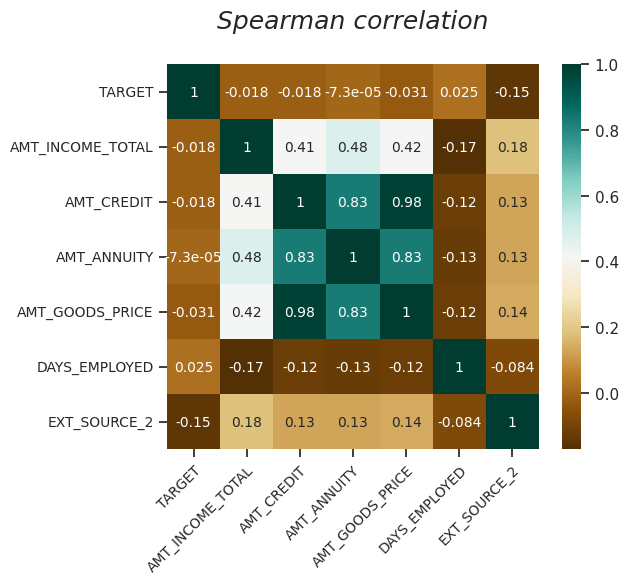

In [123]:
sns.set(style="ticks", rc={'figure.figsize': (6, 5)})
#cmap = sns.diverging_palette(145, 280, s=99, l=30, n=24)

df_analyse_num = clean_X_train.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num-df_analyse_num.mean(axis=0)
                   )/df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')
plt.title("Spearman correlation\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

In [124]:
a = np.empty((len(df_analyse_norm.columns), len(df_analyse_norm.columns),))
a[:] = np.nan
for i in range(0, len(df_analyse_norm.columns)):
    for j in range(0, len(df_analyse_norm.columns)):
        a[i, j] = stats.spearmanr(
            df_analyse_norm.iloc[:, i], df_analyse_norm.iloc[:, j])[1]

df_pvalue = round(pd.DataFrame(
    a, columns=df_analyse_norm.columns, index=df_analyse_norm.columns), 5)

In [125]:
cm = sns.light_palette("green", as_cmap=True)

df_pvalue.\
    style.background_gradient(cmap=cm).set_precision(3)

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2
TARGET,0.000,0.000,0.000,0.968,0.000,0.000,0.000
AMT_INCOME_TOTAL,0.000,0.000,0.000,0.000,0.000,0.000,0.000
AMT_CREDIT,0.000,0.000,0.000,0.000,0.000,0.000,0.000
AMT_ANNUITY,0.968,0.000,0.000,0.000,0.000,0.000,0.000
AMT_GOODS_PRICE,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DAYS_EMPLOYED,0.000,0.000,0.000,0.000,0.000,0.000,0.000
EXT_SOURCE_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [126]:
clean_X_train.drop(labels='AMT_GOODS_PRICE',
                   axis=1, inplace=True)

clean_X_test.drop(labels='AMT_GOODS_PRICE',
                  axis=1, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 32), (48744, 31))

### Creating new features

In [127]:
clean_X_train['repayment_time_months'] = round(clean_X_train['AMT_CREDIT'] / clean_X_train['AMT_ANNUITY'], 0)

In [128]:
clean_X_test['repayment_time_months'] = round(clean_X_test['AMT_CREDIT'] / clean_X_test['AMT_ANNUITY'], 0)

In [129]:
clean_X_train.drop(labels='AMT_ANNUITY',
                   axis=1, inplace=True)
clean_X_test.drop(labels='AMT_ANNUITY',
                  axis=1, inplace=True)
clean_X_train.shape, clean_X_test.shape

((307511, 32), (48744, 31))

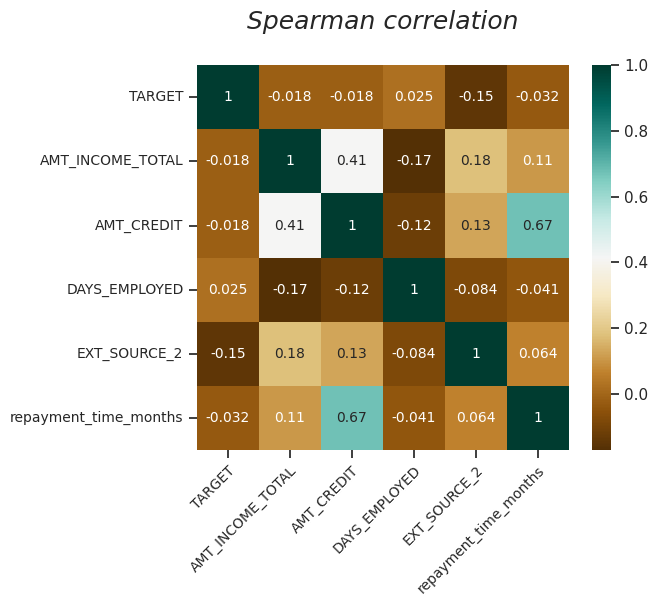

In [130]:
sns.set(style="ticks", rc={'figure.figsize': (6, 5)})
#cmap = sns.diverging_palette(145, 280, s=99, l=30, n=24)

df_analyse_num = clean_X_train.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num-df_analyse_num.mean(axis=0)
                   )/df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')
plt.title("Spearman correlation\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

In [131]:
clean_X_train.select_dtypes(include=[np.number])

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,EXT_SOURCE_2,repayment_time_months
0,100002,1,"202,500.00","406,597.50",-637,0.26,16.00
1,100003,0,"270,000.00","1,293,502.50",-1188,0.62,36.00
2,100004,0,"67,500.00","135,000.00",-225,0.56,20.00
3,100006,0,"135,000.00","312,682.50",-3039,0.65,11.00
4,100007,0,"121,500.00","513,000.00",-3038,0.32,23.00
...,...,...,...,...,...,...,...
307506,456251,0,"157,500.00","254,700.00",-236,0.68,9.00
307507,456252,0,"72,000.00","269,550.00",365243,0.12,22.00
307508,456253,0,"153,000.00","677,664.00",-7921,0.54,23.00
307509,456254,1,"171,000.00","370,107.00",-4786,0.51,18.00


In [132]:
#clean_X_train['DAYS_EMPLOYED'] = round(clean_X_train['DAYS_EMPLOYED'] / -365, 0)
pd.qcut(clean_X_train.DAYS_EMPLOYED, q=5).head(7)

0      (-822.0, -144.0]
1     (-1695.0, -822.0]
2      (-822.0, -144.0]
3    (-3231.0, -1695.0]
4    (-3231.0, -1695.0]
5     (-1695.0, -822.0]
6    (-3231.0, -1695.0]
Name: DAYS_EMPLOYED, dtype: category
Categories (5, interval[float64, right]): [(-17912.001, -3231.0] < (-3231.0, -1695.0] < (-1695.0, -822.0] <
                                           (-822.0, -144.0] < (-144.0, 365243.0]]

In [133]:
clean_X_train['years_since_employment'] = pd.qcut(clean_X_train.DAYS_EMPLOYED,
                                             q=5,
                                             labels=['currently_unemployed',
                                                     '2_or_les',
                                                     '3_to_5',
                                                     '6_to_9', '10_or_more'])

clean_X_train['years_since_employment'].value_counts()

6_to_9                  61574
currently_unemployed    61516
2_or_les                61506
3_to_5                  61490
10_or_more              61425
Name: years_since_employment, dtype: int64

In [134]:
clean_X_test['DAYS_EMPLOYED'] = round(clean_X_test['DAYS_EMPLOYED'] / -365, 0)

In [135]:
pd.qcut(clean_X_test.DAYS_EMPLOYED, q=5).head(7)

0     (5.0, 9.0]
1    (9.0, 48.0]
2    (9.0, 48.0]
3     (2.0, 5.0]
4     (5.0, 9.0]
5    (9.0, 48.0]
6     (5.0, 9.0]
Name: DAYS_EMPLOYED, dtype: category
Categories (5, interval[float64, right]): [(-1001.001, 0.0] < (0.0, 2.0] < (2.0, 5.0] < (5.0, 9.0] <
                                           (9.0, 48.0]]

In [136]:
bins = [-1001.001, 0.0, 2.0, 5.0, 9.0, 48.0]
clean_X_test['years_since_employment'] = pd.cut(clean_X_test.DAYS_EMPLOYED,
                                           bins=bins,
                                           include_lowest=True,
                                           labels=['currently_unemployed',
                                                   '2_or_les',
                                                   '3_to_5',
                                                   '6_to_9',
                                                   '10_or_more'])

clean_X_test['years_since_employment'].value_counts()

3_to_5                  11264
currently_unemployed    10584
10_or_more               9249
2_or_les                 9210
6_to_9                   8437
Name: years_since_employment, dtype: int64

In [137]:
clean_X_train.drop(labels='DAYS_EMPLOYED',
                   axis=1, inplace=True)

clean_X_test.drop(labels='DAYS_EMPLOYED',
                  axis=1, inplace=True)

### another look at the correlations

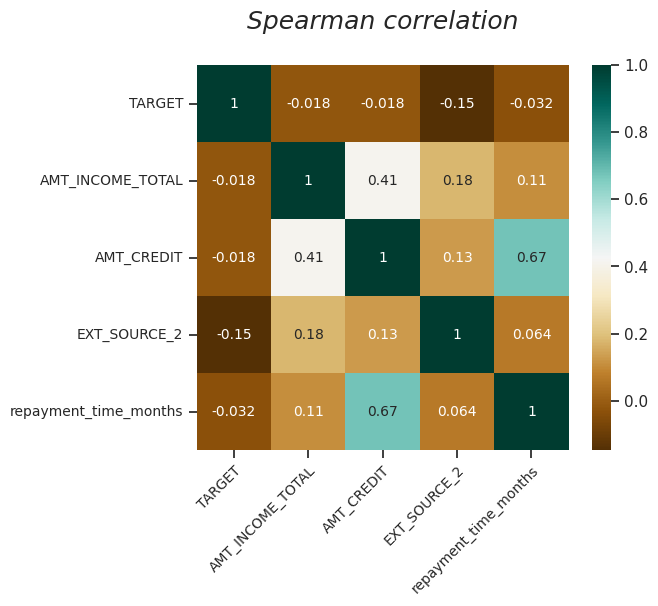

In [138]:
sns.set(style="ticks", rc={'figure.figsize': (6, 5)})
#cmap = sns.diverging_palette(145, 280, s=99, l=30, n=24)

df_analyse_num = clean_X_train.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num-df_analyse_num.mean(axis=0)
                   )/df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')
plt.title("Spearman correlation\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

## Previous applications

In [139]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [140]:
var_to_drop = [var for var in previous_application.columns if previous_application[var].isnull().mean() > 0.2]
previous_application.drop(labels=var_to_drop, axis=1, inplace=True)

In [141]:
var_num = previous_application.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).select_dtypes(include=[np.number]).columns.to_list()
print(var_num)

['AMT_APPLICATION', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA']


In [142]:
previous_application.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).select_dtypes(include=[np.number]).describe()

,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,"1,670,214.00","1,670,213.00","1,670,214.00","1,670,214.00","1,670,214.00","1,670,214.00"
mean,"175,233.86","196,114.02",12.48,1.00,-880.68,313.95
std,"292,779.76","318,574.62",3.33,0.06,779.10,"7,127.44"
min,0.00,0.00,0.00,0.00,"-2,922.00",-1.00
25%,"18,720.00","24,160.50",10.00,1.00,"-1,300.00",-1.00
50%,"71,046.00","80,541.00",12.00,1.00,-581.00,3.00
75%,"180,360.00","216,418.50",15.00,1.00,-280.00,82.00
max,"6,905,160.00","6,905,160.00",23.00,1.00,-1.00,"4,000,000.00"


In [143]:
# Check if the given application is the last one. And only take that one into account as
# people can have several applications a day.
previous_application['NFLAG_LAST_APPL_IN_DAY'].value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [144]:
previous_application.query('NFLAG_LAST_APPL_IN_DAY == 1', inplace=True)
previous_application.drop(labels='NFLAG_LAST_APPL_IN_DAY', axis=1, inplace=True)
previous_application.shape

(1664314, 22)

In [145]:
previous_application.drop(labels='SELLERPLACE_AREA', axis=1, inplace=True)
previous_application.shape

(1664314, 21)

In [146]:
previous_application['DAYS_DECISION'] = round(previous_application['DAYS_DECISION'] / -365, 0)

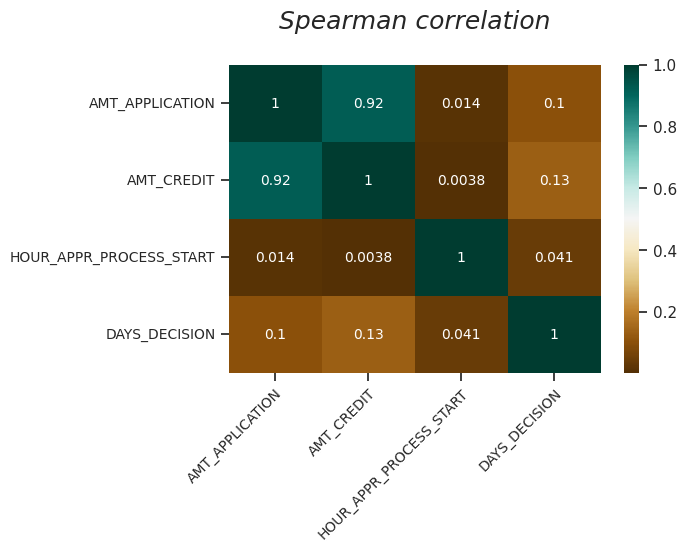

In [147]:
sns.set(style="ticks", rc={'figure.figsize': (6, 4)})
#cmap = sns.diverging_palette(145, 280, s=99, l=30, n=24)

df_analyse_num = previous_application.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num-df_analyse_num.mean(axis=0)
                   )/df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')
plt.title("Spearman correlation\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

**Let's disregard `AMT_APPLICATION` as it's highly correlated with `AMT_CREDIT`

In [148]:
prev_appli_1 = previous_application.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_PREV': 'count',
                                                                                 'AMT_CREDIT': 'mean',
                                                                                 'DAYS_DECISION': 'mean'})

In [149]:
prev_appli_1 = prev_appli_1.rename(columns={'SK_ID_PREV': 'number_of_previous_loans',
                                            'AMT_CREDIT': 'previous_amount_credit',
                                            'DAYS_DECISION': 'number_of_years_since_last_decision'})

In [150]:
clean_X_train_join1 = clean_X_train.merge(prev_appli_1, how='left', on='SK_ID_CURR')
clean_X_train_join1.shape

(307511, 35)

In [151]:
clean_X_train_join1.isna().mean() *100

SK_ID_CURR                            0.00
TARGET                                0.00
NAME_CONTRACT_TYPE                    0.00
CODE_GENDER                           0.00
FLAG_OWN_CAR                          0.00
FLAG_OWN_REALTY                       0.00
CNT_CHILDREN                          0.00
AMT_INCOME_TOTAL                      0.00
AMT_CREDIT                            0.00
NAME_TYPE_SUITE                       0.00
NAME_INCOME_TYPE                      0.00
NAME_EDUCATION_TYPE                   0.00
NAME_FAMILY_STATUS                    0.00
NAME_HOUSING_TYPE                     3.64
FLAG_EMP_PHONE                        0.00
FLAG_WORK_PHONE                       0.00
FLAG_PHONE                            0.00
CNT_FAM_MEMBERS                       0.00
WEEKDAY_APPR_PROCESS_START            0.00
REG_REGION_NOT_LIVE_REGION            0.00
REG_REGION_NOT_WORK_REGION            0.00
LIVE_REGION_NOT_WORK_REGION           0.00
REG_CITY_NOT_LIVE_CITY                0.00
REG_CITY_NO

**~5.4% of clients are first time loan appliers**
We'll replace their numbers with zeros

In [152]:
var_num = ['number_of_previous_loans', 'previous_amount_credit', 'number_of_years_since_last_decision']

for var in var_num:
    clean_X_train_join1[var].fillna(0, inplace=True)

In [153]:
# Now with the test data
clean_X_test_join1 = clean_X_test.merge(prev_appli_1, how='left', on='SK_ID_CURR')
clean_X_test_join1.shape

(48744, 34)

In [154]:
for var in var_num:
    clean_X_test_join1[var].fillna(0, inplace=True)

In [155]:
print(clean_X_test_join1[var_num].isna().mean() *100)
print(clean_X_train_join1[var_num].isna().mean() *100)

number_of_previous_loans              0.00
previous_amount_credit                0.00
number_of_years_since_last_decision   0.00
dtype: float64
number_of_previous_loans              0.00
previous_amount_credit                0.00
number_of_years_since_last_decision   0.00
dtype: float64


In [156]:
clean_X_train_join1.to_csv(path+'checkpoint_1_train.csv', index=False)
clean_X_test_join1.to_csv(path+'checkpoint_1_test.csv', index=False)

**Load data from checkpoint to continue**

### Other datasets

In [157]:
clean_X_train_join1 = pd.read_csv(path+'checkpoint_1_train.csv')
clean_X_test_join1 = pd.read_csv(path+'checkpoint_1_test.csv')

In [158]:
cat_var = previous_application.select_dtypes(exclude=[np.number]).columns.to_list()
print(cat_var)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [159]:
# Categorical Variables
def cat_analyzer(dataframe, variable):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe) *100}), end="\n\n\n")


for i in cat_var:
    cat_analyzer(previous_application, i)

NAME_CONTRACT_TYPE
                  COUNT  RATIO
Cash loans       747147  44.89
Consumer loans   728870  43.79
Revolving loans  187951  11.29
XNA                 346   0.02


WEEKDAY_APPR_PROCESS_START
            COUNT  RATIO
TUESDAY    254289  15.28
WEDNESDAY  253363  15.22
MONDAY     252780  15.19
FRIDAY     251190  15.09
THURSDAY   248311  14.92
SATURDAY   239993  14.42
SUNDAY     164388   9.88


FLAG_LAST_APPL_PER_CONTRACT
     COUNT  RATIO
Y  1660953  99.80
N     3361   0.20


NAME_CASH_LOAN_PURPOSE
                                   COUNT  RATIO
XAP                               917167  55.11
XNA                               677576  40.71
Repairs                            23750   1.43
Other                              15589   0.94
Urgent needs                        8400   0.50
Buying a used car                   2888   0.17
Building a house or an annex        2693   0.16
Everyday expenses                   2412   0.14
Medicine                            2174   0.13
Payments

In [160]:
map_status = {'Approved' : 'approved',
              'Canceled' : 'canceled_unused',
              'Refused' : 'refused',
              'Unused offer' : 'canceled_unused'}

previous_application['NAME_CONTRACT_STATUS'] = previous_application['NAME_CONTRACT_STATUS'].map(map_status)

In [161]:
map_contrat_type = {'Cash loans': 'cash_loans',
                    'Consumer loans': 'consumer_loans',
                    'Revolving loans': 'revolving_loans',
                    'XNA': 'revolving_loans'}

previous_application['NAME_CONTRACT_TYPE'] = previous_application['NAME_CONTRACT_TYPE'].map(map_contrat_type)

In [162]:
prev_appli_2 = previous_application[['SK_ID_CURR', 'NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']]

# Encoding the columns right away
prev_appli_2 = pd.get_dummies(prev_appli_2,
                              columns=["NAME_CONTRACT_STATUS",
                                       "NAME_CONTRACT_TYPE"],
                              prefix={'NAME_CONTRACT_STATUS': 'prev_contrat_statut',
                                      'NAME_CONTRACT_TYPE': 'prev_contrat_type'},
                              drop_first=True)

prev_appli_2 = prev_appli_2.groupby(['SK_ID_CURR'], as_index=False).sum()
prev_appli_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338810 entries, 0 to 338809
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   SK_ID_CURR                           338810 non-null  int64
 1   prev_contrat_statut_canceled_unused  338810 non-null  uint8
 2   prev_contrat_statut_refused          338810 non-null  uint8
 3   prev_contrat_type_consumer_loans     338810 non-null  uint8
 4   prev_contrat_type_revolving_loans    338810 non-null  uint8
dtypes: int64(1), uint8(4)
memory usage: 3.9 MB


In [163]:
clean_X_train_join2 = clean_X_train_join1.merge(prev_appli_2, how='left', on='SK_ID_CURR')
clean_X_train_join2.shape

(307511, 39)

In [164]:
for var in prev_appli_2.drop(labels='SK_ID_CURR', axis=1).columns.to_list():
  clean_X_train_join2[var].fillna(0, inplace=True)

In [165]:
clean_X_test_join2 = clean_X_test_join1.merge(prev_appli_2, how='left', on='SK_ID_CURR')
clean_X_test_join2.shape

(48744, 38)

In [166]:
for var in prev_appli_2.drop(labels='SK_ID_CURR', axis=1).columns.to_list():
    clean_X_test_join2[var].fillna(0, inplace=True)

In [167]:
clean_X_train_join2.shape, clean_X_test_join2.shape

((307511, 39), (48744, 38))

In [168]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.00,6,"-1,180.00","-1,187.00","6,948.36","6,948.36"
1,1330831,151639,0.00,34,"-2,156.00","-2,156.00","1,716.53","1,716.53"
2,2085231,193053,2.00,1,-63.00,-63.00,"25,425.00","25,425.00"
3,2452527,199697,1.00,3,"-2,418.00","-2,426.00","24,350.13","24,350.13"
4,2714724,167756,1.00,2,"-1,383.00","-1,366.00","2,165.04","2,160.59"
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.00,66,"-1,624.00",NaN,67.50,NaN
13605397,1310347,414406,0.00,47,"-1,539.00",NaN,67.50,NaN
13605398,1308766,402199,0.00,43,-7.00,NaN,"43,737.43",NaN
13605399,1062206,409297,0.00,43,"-1,986.00",NaN,67.50,NaN


In [169]:
installments_payments.isna().mean() * 100

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NUM_INSTALMENT_VERSION   0.00
NUM_INSTALMENT_NUMBER    0.00
DAYS_INSTALMENT          0.00
DAYS_ENTRY_PAYMENT       0.02
AMT_INSTALMENT           0.00
AMT_PAYMENT              0.02
dtype: float64

In [170]:
installments_payments['DAYS_INSTALMENT'] = round(installments_payments['DAYS_INSTALMENT'] / -365, 0)
installments_payments['DAYS_ENTRY_PAYMENT'] = round(installments_payments['DAYS_ENTRY_PAYMENT'] / -365, 0)

In [171]:
ins_payments = installments_payments.groupby(['SK_ID_CURR'], as_index=False).agg({'NUM_INSTALMENT_VERSION': 'nunique',
                                                                                  'NUM_INSTALMENT_NUMBER': 'sum',
                                                                                  'DAYS_INSTALMENT': 'mean',
                                                                                  'DAYS_ENTRY_PAYMENT': 'mean',
                                                                                  'AMT_INSTALMENT': 'sum',
                                                                                  'AMT_PAYMENT': 'sum'})

In [172]:
ins_payments['amount_paid_vs_due'] = (ins_payments['AMT_PAYMENT'] / ins_payments['AMT_INSTALMENT'])

In [173]:
def map_amt_paid_vs_due(amount):
  if amount > 1:
    return "paid_more_than_ins"
  elif amount == 1:
    return "paid_ins"
  else:
    return "paid_less_than_ins"

In [174]:
ins_payments['amount_paid_vs_due'] = ins_payments['amount_paid_vs_due'].apply(map_amt_paid_vs_due)

In [175]:
ins_payments['DAYS_ENTRY_PAYMENT']

0        6.14
1        0.84
2        3.84
3        2.00
4        1.78
         ... 
339582   0.43
339583   6.67
339584   6.71
339585   0.42
339586   1.32
Name: DAYS_ENTRY_PAYMENT, Length: 339587, dtype: float64

In [176]:
ins_payments['late_with_previous_ins'] = ins_payments['DAYS_INSTALMENT'] - ins_payments['DAYS_ENTRY_PAYMENT']

In [177]:
ins_payments['late_with_previous_ins']

0         0.00
1        -0.11
2         0.00
3         0.00
4        -0.11
          ... 
339582   -0.29
339583    0.00
339584   -0.07
339585   -0.05
339586    0.00
Name: late_with_previous_ins, Length: 339587, dtype: float64

In [178]:
ins_payments['late_with_previous_ins'] = ins_payments['late_with_previous_ins'].apply(lambda x: "yes" if x < 0 else "no")

In [179]:
ins_payments['late_with_previous_ins'].value_counts()

yes    184806
no     154781
Name: late_with_previous_ins, dtype: int64

In [180]:
ins_payments_to_join = ins_payments[['late_with_previous_ins', 'amount_paid_vs_due', 'SK_ID_CURR']]

In [181]:
ins_payments_to_join

,late_with_previous_ins,amount_paid_vs_due,SK_ID_CURR
0,no,paid_ins,100001
1,yes,paid_ins,100002
2,no,paid_ins,100003
3,no,paid_ins,100004
4,yes,paid_ins,100005
...,...,...,...
339582,yes,paid_ins,456251
339583,no,paid_ins,456252
339584,yes,paid_less_than_ins,456253
339585,yes,paid_ins,456254


In [182]:
ins_payments_to_join_2 = pd.get_dummies(ins_payments_to_join,
                              columns=["amount_paid_vs_due", "late_with_previous_ins"],
                              prefix={'amount_paid_vs_due': "", 'late_with_previous_ins': "late_with_previous_ins_"},
                              prefix_sep="",
                              drop_first=False)

In [183]:
ins_payments_to_join_2

,SK_ID_CURR,paid_ins,paid_less_than_ins,paid_more_than_ins,late_with_previous_ins_no,late_with_previous_ins_yes
0,100001,1,0,0,1,0
1,100002,1,0,0,0,1
2,100003,1,0,0,1,0
3,100004,1,0,0,1,0
4,100005,1,0,0,0,1
...,...,...,...,...,...,...
339582,456251,1,0,0,0,1
339583,456252,1,0,0,1,0
339584,456253,0,1,0,0,1
339585,456254,1,0,0,0,1


In [184]:
clean_X_train_join3 = clean_X_train_join2.merge(ins_payments_to_join_2, how='left', on='SK_ID_CURR')
clean_X_train_join3.shape

(307511, 44)

In [185]:
clean_X_test_join3 = clean_X_test_join2.merge(ins_payments_to_join_2, how='left', on='SK_ID_CURR')
clean_X_test_join3.shape

(48744, 43)

In [186]:
clean_X_train_join3.dropna(inplace=True)
clean_X_test_join3.dropna(inplace=True)

In [187]:
clean_X_train_join3.shape, clean_X_test_join3.shape

((280830, 44), (45929, 43))

In [188]:
# The following datasets are left out to process:
# bureau
# bureau_balance
# pos_cash
# credit_card

In [189]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [190]:
columns_description[columns_description['Row'] == 'STATUS'].iloc[0]['Description']

'Status of Credit Bureau loan during the month (active, closed, DPD0-30,\x85 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,\x85 5 means DPD 120+ or sold or written off ] )'

In [191]:
bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [192]:
map_status_bureau = {
    'C': 'closed',
    'X': 'unknown',
    '0': 'active_no_delay',
    '1': 'active_with_delay',
    '2': 'active_with_delay',
    '3': 'active_with_delay',
    '4': 'active_with_delay',
    '5': 'active_with_delay'
}
bureau_balance['credit_bureau_status'] = bureau_balance['STATUS'].map(map_status_bureau)
bureau_balance.drop(columns=['STATUS'], inplace=True)

In [193]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,credit_bureau_status
0,5715448,0,closed
1,5715448,-1,closed
2,5715448,-2,closed
3,5715448,-3,closed
4,5715448,-4,closed
...,...,...,...
27299920,5041336,-47,unknown
27299921,5041336,-48,unknown
27299922,5041336,-49,unknown
27299923,5041336,-50,unknown


In [194]:
bureau_balance = pd.get_dummies(bureau_balance,
                                columns=["credit_bureau_status"],
                                prefix={'credit_bureau_status': 'credit_bureau_status'})

In [195]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,credit_bureau_status_active_no_delay,credit_bureau_status_active_with_delay,credit_bureau_status_closed,credit_bureau_status_unknown
0,5715448,0,0,0,1,0
1,5715448,-1,0,0,1,0
2,5715448,-2,0,0,1,0
3,5715448,-3,0,0,1,0
4,5715448,-4,0,0,1,0
...,...,...,...,...,...,...
27299920,5041336,-47,0,0,0,1
27299921,5041336,-48,0,0,0,1
27299922,5041336,-49,0,0,0,1
27299923,5041336,-50,0,0,0,1


In [196]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [197]:
bureau.isna().mean()*100

SK_ID_CURR                0.00
SK_ID_BUREAU              0.00
CREDIT_ACTIVE             0.00
CREDIT_CURRENCY           0.00
DAYS_CREDIT               0.00
CREDIT_DAY_OVERDUE        0.00
DAYS_CREDIT_ENDDATE       6.15
DAYS_ENDDATE_FACT        36.92
AMT_CREDIT_MAX_OVERDUE   65.51
CNT_CREDIT_PROLONG        0.00
AMT_CREDIT_SUM            0.00
AMT_CREDIT_SUM_DEBT      15.01
AMT_CREDIT_SUM_LIMIT     34.48
AMT_CREDIT_SUM_OVERDUE    0.00
CREDIT_TYPE               0.00
DAYS_CREDIT_UPDATE        0.00
AMT_ANNUITY              71.47
dtype: float64

In [198]:
var_to_drop=['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
             'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']

bureau.drop(labels=var_to_drop, axis=1, inplace= True)

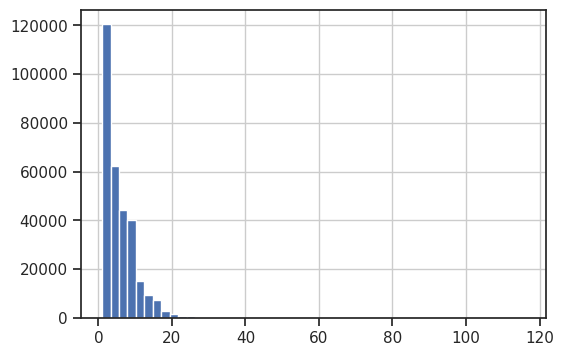

std        4.43
max      116.00
median     4.00
min        1.00
mean       5.61
Name: SK_ID_BUREAU, dtype: float64

In [199]:
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().hist(bins=50), plt.show()
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().agg({"min", "max", "mean", "median", "std"})

In [200]:
cat_var = bureau.select_dtypes(exclude=[np.number]).columns.to_list()
print(cat_var)

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


In [201]:
bureau.drop(columns=['CREDIT_CURRENCY'], axis=1, inplace=True)

map_credit_active = {'Closed': 'closed',
                     'Active': 'active',
                     'Sold': 'sold_bad_debt',
                     'Bad debt': 'sold_bad_debt'}

bureau['CREDIT_ACTIVE'] = bureau['CREDIT_ACTIVE'].map(map_credit_active)

map_credit_type = {"Consumer credit": "consumer_credit",
                   "Credit card": "credit_card",
                   "Car loan" : "other_credit",
                   "Mortgage" : "other_credit",
                   "Microloan" : "other_credit",
                   "Loan for business development" : "other_credit",
                   "Another type of loan" : "other_credit",
                   "Unknown type of loan" : "other_credit",
                   "Loan for working capital replenishment" : "other_credit",
                   "Cash loan (non-earmarked)" : "other_credit",
                   "Real estate loan" : "other_credit",
                   "Loan for the purchase of equipment" : "other_credit",
                   "Loan for purchase of shares (margin lending)" : "other_credit",
                   "Mobile operator loan" : "other_credit",
                   "Interbank credit" : "other_credit"}

bureau['CREDIT_TYPE'] = bureau['CREDIT_TYPE'].map(map_credit_type)

In [202]:
bureau = pd.get_dummies(bureau,
                        columns=["CREDIT_ACTIVE",
                                 "CREDIT_TYPE"],
                        prefix={'CREDIT_ACTIVE': 'bureau_credit_active',
                                'CREDIT_TYPE': 'bureau_credit_type'},
                       drop_first=True)

In [203]:
var_num = bureau.drop(labels=['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).select_dtypes(include=[np.number]).columns.to_list()
print(var_num)

['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'bureau_credit_active_closed', 'bureau_credit_active_sold_bad_debt', 'bureau_credit_type_credit_card', 'bureau_credit_type_other_credit']


In [204]:
var_to_drop = ['CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE']
bureau.drop(labels=var_to_drop, axis=1, inplace= True)
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 9 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   SK_ID_CURR                          int64  
 1   SK_ID_BUREAU                        int64  
 2   DAYS_CREDIT                         int64  
 3   AMT_CREDIT_SUM                      float64
 4   DAYS_CREDIT_UPDATE                  int64  
 5   bureau_credit_active_closed         uint8  
 6   bureau_credit_active_sold_bad_debt  uint8  
 7   bureau_credit_type_credit_card      uint8  
 8   bureau_credit_type_other_credit     uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 72.0 MB


In [205]:
bureau['DAYS_CREDIT'] = round(bureau['DAYS_CREDIT'] / -365, 0)
bureau['DAYS_CREDIT_UPDATE'] = round(bureau['DAYS_CREDIT_UPDATE'] / -365, 0)

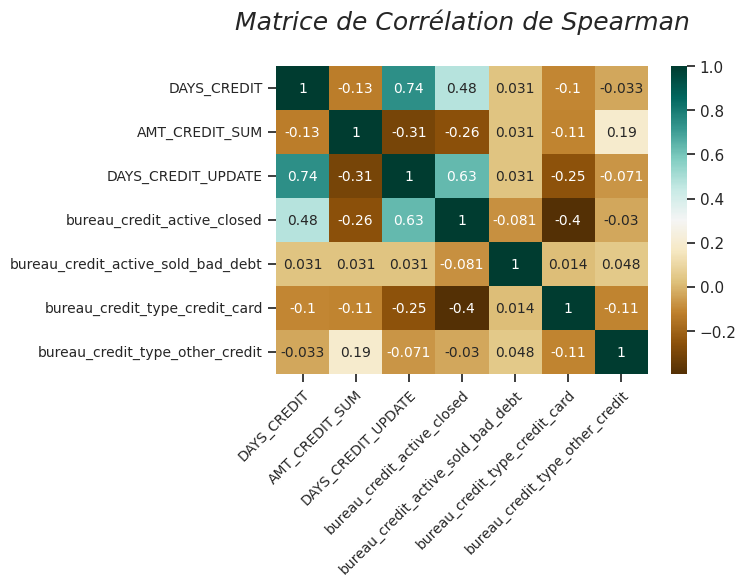

In [206]:
sns.set(style="ticks", rc={'figure.figsize': (6, 4)})
#cmap = sns.diverging_palette(145, 280, s=99, l=30, n=24)

df_analyse_num = bureau.drop(labels=['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num-df_analyse_num.mean(axis=0)
                   )/df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')
plt.title("Matrice de Corrélation de Spearman\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

In [207]:
def high_correlation(mat_corr, corr_value = 0.7):
    for i in mat_corr.columns:
        cr = mat_corr.loc[i].loc[(mat_corr.loc[i] >= corr_value) | (mat_corr.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

high_correlation(corr_df, corr_value = 0.7)

DAYS_CREDIT
-------------------------------
DAYS_CREDIT_UPDATE   0.74
Name: DAYS_CREDIT, dtype: float64


DAYS_CREDIT_UPDATE
-------------------------------
DAYS_CREDIT   0.74
Name: DAYS_CREDIT_UPDATE, dtype: float64




In [208]:
bureau.drop(labels=['DAYS_CREDIT_UPDATE'], axis=1, inplace=True)
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 8 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   SK_ID_CURR                          int64  
 1   SK_ID_BUREAU                        int64  
 2   DAYS_CREDIT                         float64
 3   AMT_CREDIT_SUM                      float64
 4   bureau_credit_active_closed         uint8  
 5   bureau_credit_active_sold_bad_debt  uint8  
 6   bureau_credit_type_credit_card      uint8  
 7   bureau_credit_type_other_credit     uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 58.9 MB


In [209]:
bureau_balance.drop(columns=['MONTHS_BALANCE'], inplace=True)

In [210]:
bureau = bureau.merge(bureau_balance, how='left', on='SK_ID_BUREAU')
bureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25121815 entries, 0 to 25121814
Data columns (total 12 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   SK_ID_CURR                              int64  
 1   SK_ID_BUREAU                            int64  
 2   DAYS_CREDIT                             float64
 3   AMT_CREDIT_SUM                          float64
 4   bureau_credit_active_closed             uint8  
 5   bureau_credit_active_sold_bad_debt      uint8  
 6   bureau_credit_type_credit_card          uint8  
 7   bureau_credit_type_other_credit         uint8  
 8   credit_bureau_status_active_no_delay    float64
 9   credit_bureau_status_active_with_delay  float64
 10  credit_bureau_status_closed             float64
 11  credit_bureau_status_unknown            float64
dtypes: float64(6), int64(2), uint8(4)
memory usage: 1.8 GB


In [211]:
bureau.isna().mean()*100

SK_ID_CURR                               0.00
SK_ID_BUREAU                             0.00
DAYS_CREDIT                              0.00
AMT_CREDIT_SUM                           0.00
bureau_credit_active_closed              0.00
bureau_credit_active_sold_bad_debt       0.00
bureau_credit_type_credit_card           0.00
bureau_credit_type_other_credit          0.00
credit_bureau_status_active_no_delay     3.75
credit_bureau_status_active_with_delay   3.75
credit_bureau_status_closed              3.75
credit_bureau_status_unknown             3.75
dtype: float64

In [212]:
bureau.dropna(inplace=True)

In [213]:
client_bureau = bureau.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_BUREAU': 'count',
                                                                    'DAYS_CREDIT': 'mean',
                                                                    'AMT_CREDIT_SUM': 'sum',
                                                                    'bureau_credit_active_closed': 'sum',
                                                                    'bureau_credit_active_sold_bad_debt': 'sum',
                                                                    'bureau_credit_type_credit_card': 'sum',
                                                                    'bureau_credit_type_other_credit': 'sum',
                                                                    'credit_bureau_status_active_no_delay': 'sum',
                                                                    'credit_bureau_status_active_with_delay': 'sum',
                                                                    'credit_bureau_status_closed': 'sum',
                                                                    'credit_bureau_status_unknown': 'sum'
                                                                    })

client_bureau.drop(labels='SK_ID_CURR', axis=1).describe()

,SK_ID_BUREAU,DAYS_CREDIT,AMT_CREDIT_SUM,bureau_credit_active_closed,bureau_credit_active_sold_bad_debt,bureau_credit_type_credit_card,bureau_credit_type_other_credit,credit_bureau_status_active_no_delay,credit_bureau_status_active_with_delay,credit_bureau_status_closed,credit_bureau_status_unknown
count,"134,542.00","134,542.00","134,542.00","134,542.00","134,542.00","134,542.00","134,542.00","134,542.00","134,542.00","134,542.00","134,542.00"
mean,179.72,3.50,"61,007,222.56",137.59,0.91,37.31,6.15,53.48,2.33,85.89,38.02
std,178.41,1.71,"198,853,181.75",154.83,7.84,54.64,21.44,54.53,7.72,109.83,63.58
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,52.00,2.13,"7,512,182.50",28.00,0.00,0.00,0.00,15.00,0.00,8.00,2.00
50%,125.00,3.49,"24,786,000.00",88.00,0.00,18.00,0.00,36.00,0.00,47.00,12.00
75%,250.00,4.78,"67,341,171.79",194.00,0.00,51.00,0.00,74.00,2.00,122.00,47.00
max,"2,791.00",8.00,"53,595,386,685.00","2,609.00",350.00,826.00,913.00,696.00,396.00,"1,981.00","1,097.00"


In [214]:
clean_X_train_join4 = clean_X_train_join3.merge(client_bureau, how='left', on='SK_ID_CURR')
clean_X_train_join4.shape

(280830, 55)

In [215]:
clean_X_test_join4 = clean_X_test_join3.merge(client_bureau, how='left', on='SK_ID_CURR')
clean_X_test_join4.shape

(45929, 54)

In [216]:
clean_X_train_join4.isna().mean() * 100

SK_ID_CURR                                0.00
TARGET                                    0.00
NAME_CONTRACT_TYPE                        0.00
CODE_GENDER                               0.00
FLAG_OWN_CAR                              0.00
FLAG_OWN_REALTY                           0.00
CNT_CHILDREN                              0.00
AMT_INCOME_TOTAL                          0.00
AMT_CREDIT                                0.00
NAME_TYPE_SUITE                           0.00
NAME_INCOME_TYPE                          0.00
NAME_EDUCATION_TYPE                       0.00
NAME_FAMILY_STATUS                        0.00
NAME_HOUSING_TYPE                         0.00
FLAG_EMP_PHONE                            0.00
FLAG_WORK_PHONE                           0.00
FLAG_PHONE                                0.00
CNT_FAM_MEMBERS                           0.00
WEEKDAY_APPR_PROCESS_START                0.00
REG_REGION_NOT_LIVE_REGION                0.00
REG_REGION_NOT_WORK_REGION                0.00
LIVE_REGION_N

In [217]:
clean_X_train_join4.drop(columns=['SK_ID_BUREAU'], inplace=True)
clean_X_test_join4.drop(columns=['SK_ID_BUREAU'], inplace=True)
list_var3 = ['DAYS_CREDIT',
             'AMT_CREDIT_SUM',
             'bureau_credit_active_closed',
             'bureau_credit_active_sold_bad_debt',
             'bureau_credit_type_credit_card',
             'bureau_credit_type_other_credit',
             'credit_bureau_status_active_no_delay',
             'credit_bureau_status_active_with_delay',
             'credit_bureau_status_closed',
             'credit_bureau_status_closed'
             ]

for var in list_var3:
    clean_X_train_join4[var].fillna(0, inplace=True)
    clean_X_test_join4[var].fillna(0, inplace=True)

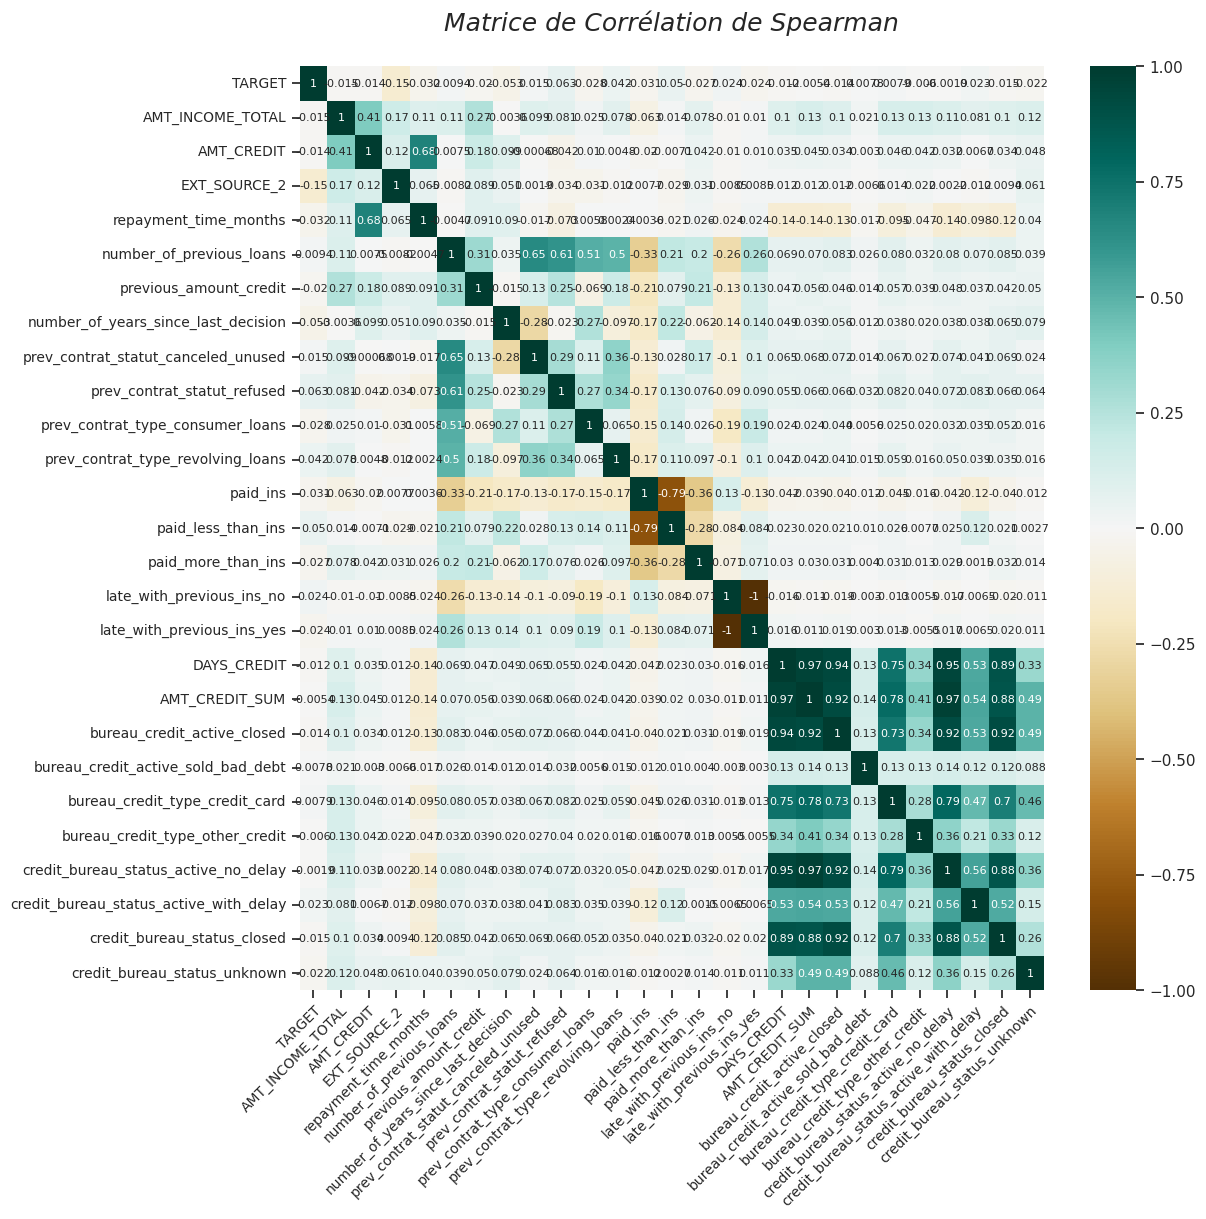

In [218]:
sns.set(style="ticks", rc={'figure.figsize': (12, 12)})
#cmap = sns.diverging_palette(145, 280, s=99, l=30, n=24)

df_analyse_num = clean_X_train_join4.drop(labels=['SK_ID_CURR'], axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num-df_analyse_num.mean(axis=0)
                   )/df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')
plt.title("Matrice de Corrélation de Spearman\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

In [219]:
def high_correlation(mat_corr, corr_value = 0.7):
    for i in mat_corr.columns:
        cr = mat_corr.loc[i].loc[(mat_corr.loc[i] >= corr_value) | (mat_corr.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

high_correlation(corr_df, corr_value = 0.7)

#

paid_ins
-------------------------------
paid_less_than_ins   -0.79
Name: paid_ins, dtype: float64


paid_less_than_ins
-------------------------------
paid_ins   -0.79
Name: paid_less_than_ins, dtype: float64


late_with_previous_ins_no
-------------------------------
late_with_previous_ins_yes   -1.00
Name: late_with_previous_ins_no, dtype: float64


late_with_previous_ins_yes
-------------------------------
late_with_previous_ins_no   -1.00
Name: late_with_previous_ins_yes, dtype: float64


DAYS_CREDIT
-------------------------------
AMT_CREDIT_SUM                         0.97
credit_bureau_status_active_no_delay   0.95
bureau_credit_active_closed            0.94
credit_bureau_status_closed            0.89
bureau_credit_type_credit_card         0.75
Name: DAYS_CREDIT, dtype: float64


AMT_CREDIT_SUM
-------------------------------
credit_bureau_status_active_no_delay   0.97
DAYS_CREDIT                            0.97
bureau_credit_active_closed            0.92
credit_bureau_status_c

In [220]:
vars_to_drop = ['paid_ins', 'late_with_previous_ins_no', 'DAYS_CREDIT', 'bureau_credit_active_closed']

clean_X_train_join4.drop(labels=vars_to_drop, axis=1, inplace=True)
clean_X_train_join4.shape

(280830, 50)

In [221]:
clean_X_test_join4.drop(labels=vars_to_drop, axis=1, inplace=True)

In [222]:
# Save checkpoint
clean_X_train_join4.to_csv(path+'checkpoint_2_train.csv', index=False)
clean_X_test_join4.to_csv(path+'checkpoint_2_test.csv', index=False)

**Continue from 2nd checkpoint**

In [223]:
pos_cash.isna().mean()*100

SK_ID_PREV              0.00
SK_ID_CURR              0.00
MONTHS_BALANCE          0.00
CNT_INSTALMENT          0.26
CNT_INSTALMENT_FUTURE   0.26
NAME_CONTRACT_STATUS    0.00
SK_DPD                  0.00
SK_DPD_DEF              0.00
dtype: float64

In [224]:
pos_cash.drop(labels='NAME_CONTRACT_STATUS', axis=1, inplace=True)

In [225]:
pos_cash.drop(labels=['SK_DPD', 'SK_DPD_DEF'], axis=1, inplace=True)

In [226]:
client_pos_cash = pos_cash.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_PREV': 'count',
                                                                        'MONTHS_BALANCE': 'mean',
                                                                        'CNT_INSTALMENT': 'mean',
                                                                        'CNT_INSTALMENT_FUTURE': 'mean'})

client_pos_cash.drop(labels='SK_ID_CURR', axis=1).describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
count,"337,252.00","337,252.00","337,224.00","337,224.00"
mean,29.66,-31.87,14.65,9.18
std,24.53,20.08,7.97,6.50
min,1.00,-96.00,1.00,0.00
25%,12.00,-43.99,9.62,5.00
50%,22.00,-28.57,12.00,6.99
75%,39.00,-15.50,18.60,11.67
max,295.00,-1.00,72.00,60.00


In [227]:
clean_X_train_join5 = clean_X_train_join4.merge(client_pos_cash, how='left', on='SK_ID_CURR')
clean_X_train_join5.shape

clean_X_test_join5 = clean_X_test_join4.merge(client_pos_cash, how='left', on='SK_ID_CURR')
clean_X_test_join5.shape

(45929, 53)

In [228]:
clean_X_train_join5.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'FLAG_DOCUMENT_3',
       'client_age', 'id_last_renewed', 'registration_last_change',
       'repayment_time_months', 'years_since_employment',
       'number_of_previous_loans', 'previous_amount_credit',
       'number_of_years_since_last_decision',
       'prev_contrat_statut_canceled_unused', 'prev_contrat_statut_refused',
       'prev_contrat_type_consumer_loans', 'prev_contrat_type_revolving

In [229]:
clean_X_train_join5.drop(labels='credit_bureau_status_unknown', axis=1, inplace=True)
clean_X_test_join5.drop(labels='credit_bureau_status_unknown', axis=1, inplace=True)

liste_var4 = ['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

for var in liste_var4:
    clean_X_train_join5[var].fillna(0, inplace=True)
    clean_X_test_join5[var].fillna(0, inplace=True)

In [230]:
# Save checkpoint
clean_X_train_join5.to_csv(path+'checkpoint_2_train.csv', index=False)
clean_X_test_join5.to_csv(path+'checkpoint_2_test.csv', index=False)

In [231]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [232]:
credit_card.isna().mean()*100

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
MONTHS_BALANCE                0.00
AMT_BALANCE                   0.00
AMT_CREDIT_LIMIT_ACTUAL       0.00
AMT_DRAWINGS_ATM_CURRENT     19.52
AMT_DRAWINGS_CURRENT          0.00
AMT_DRAWINGS_OTHER_CURRENT   19.52
AMT_DRAWINGS_POS_CURRENT     19.52
AMT_INST_MIN_REGULARITY       7.95
AMT_PAYMENT_CURRENT          20.00
AMT_PAYMENT_TOTAL_CURRENT     0.00
AMT_RECEIVABLE_PRINCIPAL      0.00
AMT_RECIVABLE                 0.00
AMT_TOTAL_RECEIVABLE          0.00
CNT_DRAWINGS_ATM_CURRENT     19.52
CNT_DRAWINGS_CURRENT          0.00
CNT_DRAWINGS_OTHER_CURRENT   19.52
CNT_DRAWINGS_POS_CURRENT     19.52
CNT_INSTALMENT_MATURE_CUM     7.95
NAME_CONTRACT_STATUS          0.00
SK_DPD                        0.00
SK_DPD_DEF                    0.00
dtype: float64

In [233]:
credit_card.dropna(axis=1, inplace=True)

In [234]:
vars_to_drop4 = ['AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
                 'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF']

credit_card.drop(labels=vars_to_drop4, axis=1, inplace=True)

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SK_ID_PREV               int64  
 1   SK_ID_CURR               int64  
 2   MONTHS_BALANCE           int64  
 3   AMT_BALANCE              float64
 4   AMT_CREDIT_LIMIT_ACTUAL  int64  
 5   AMT_DRAWINGS_CURRENT     float64
 6   NAME_CONTRACT_STATUS     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 205.1+ MB


In [235]:
client_credit_card = credit_card.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_PREV': 'count',
                                                                              'MONTHS_BALANCE': 'mean',
                                                                              'AMT_BALANCE': 'sum',
                                                                              'AMT_CREDIT_LIMIT_ACTUAL': 'sum',
                                                                              'AMT_DRAWINGS_CURRENT': 'sum' })

In [236]:
clean_X_train_join6 = clean_X_train_join5.merge(client_credit_card, how='left', on='SK_ID_CURR')
clean_X_train_join6.shape

(280830, 58)

In [237]:
clean_X_test_join6 = clean_X_test_join5.merge(client_credit_card, how='left', on='SK_ID_CURR')
clean_X_test_join6.shape

(45929, 57)

In [238]:
clean_X_train_join6.isna().mean() * 100

SK_ID_CURR                                0.00
TARGET                                    0.00
NAME_CONTRACT_TYPE                        0.00
CODE_GENDER                               0.00
FLAG_OWN_CAR                              0.00
FLAG_OWN_REALTY                           0.00
CNT_CHILDREN                              0.00
AMT_INCOME_TOTAL                          0.00
AMT_CREDIT                                0.00
NAME_TYPE_SUITE                           0.00
NAME_INCOME_TYPE                          0.00
NAME_EDUCATION_TYPE                       0.00
NAME_FAMILY_STATUS                        0.00
NAME_HOUSING_TYPE                         0.00
FLAG_EMP_PHONE                            0.00
FLAG_WORK_PHONE                           0.00
FLAG_PHONE                                0.00
CNT_FAM_MEMBERS                           0.00
WEEKDAY_APPR_PROCESS_START                0.00
REG_REGION_NOT_LIVE_REGION                0.00
REG_REGION_NOT_WORK_REGION                0.00
LIVE_REGION_N

In [239]:
clean_X_train_join6['AMT_BALANCE'].median()

728139.4425

In [240]:
#clean_X_train_join6.drop(columns=['SK_ID_PREV_y'], inplace=True)
#clean_X_test_join6.drop(columns=['SK_ID_PREV_y'], inplace=True)

list_var = ['MONTHS_BALANCE_y', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT']
for var in list_var:
  clean_X_train_join6[var].fillna(clean_X_train_join6[var].median(), inplace=True)
  clean_X_test_join6[var].fillna(clean_X_test_join6[var].median(), inplace=True)

In [241]:
clean_X_train_join6.to_csv(path+'X_train.csv', index=False)
clean_X_test_join6.to_csv(path+'X_test.csv', index=False)